# Create a timeseries of the different model prediction errors

In [75]:
import pandas as pd

#Get how the various grid points change according to Margaritas classification
change_in_fields = pd.read_pickle('tmp_data/change_in_fields_Marg.pkl')
change_in_fields['latitude_join'] = round(change_in_fields.latitude_ERA,3)
change_in_fields['longitude_join'] = round(change_in_fields.longitude_ERA,3) #just used for joining due to loss of precision from Margs file

In [76]:
# Load all the predictions before they are averaged over the year
V15 = pd.read_pickle('tmp_data/V15_predictions.pkl')
V20 = pd.read_pickle('tmp_data/V20_predictions.pkl')
V20X = pd.read_pickle('tmp_data/V20X_predictions.pkl')
V15X = pd.read_pickle('tmp_data/V15X_predictions.pkl')


In [77]:
V15['model'] = 'V15'
V20['model'] = 'V20'
V20X['model'] = 'V20X'
V15X['model'] = 'V15X'

In [78]:
V15.shape[0]+V20.shape[0]+V20X.shape[0]+V15X.shape[0]

150737500

In [79]:
#Join it all together into a single df
df_timeseries = pd.concat([V15,V20,V20X,V15X])
df_timeseries['latitude_join'] = round(df_timeseries.latitude_ERA,3)
df_timeseries['longitude_join'] = round(df_timeseries.longitude_ERA,3)
df_timeseries.shape

(150737500, 12)

In [80]:
#Create some extra time cols
df_timeseries['month'] = pd.DatetimeIndex(df_timeseries.time).month
df_timeseries['day'] = pd.DatetimeIndex(df_timeseries.time).date

---

## Plot Lake category

In [29]:
#Create a mask to filter by
lake_condition = 'clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not si10Fr_change_is_significant'
mask = change_in_fields.query(lake_condition)
df_timeseries_categorized = pd.merge(df_timeseries,mask,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized = df_timeseries_categorized.reset_index()


In [73]:
df_timeseries_categorized[['latitude_ERA_x', 'longitude_ERA_x','time','month','day','number_of_modis_observations']]

latitude_ERA_x  longitude_ERA_x                time  month  \
0             60.843060      -161.666667 2019-01-01 00:00:00      1   
1             60.843060      -161.666667 2019-01-03 00:00:00      1   
2             60.843060      -161.666667 2019-01-05 00:00:00      1   
3             60.843060      -161.666667 2019-01-06 00:00:00      1   
4             60.843060      -161.666667 2019-01-08 00:00:00      1   
...                 ...              ...                 ...    ...   
1785759       21.779853       108.740741 2019-12-14 06:00:00     12   
1785760       21.779853       108.740741 2019-12-26 06:00:00     12   
1785761       21.779853       108.740741 2019-12-28 06:00:00     12   
1785762       21.779853       108.740741 2019-12-29 06:00:00     12   
1785763       21.779853       108.740741 2019-12-31 06:00:00     12   

                day  number_of_modis_observations  
0        2019-01-01                            90  
1        2019-01-03                            80  
2        2019-01-05                             7  
3        2019-01-06                           124  
4        2019-01-08                            66  
...             ...                           ...  
1785759  2019-12-14                            41  
1785760  2019-12-26                             1  
1785761  2019-12-28                            64  
1785762  2019-12-29                            39  
1785763  2019-12-31                             1  

[1785764 rows x 6 columns]

In [50]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.colors as mc
import matplotlib.colorbar as cb
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import seaborn as sns

import sys




def plot_timeseries(df,savefig):

    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(h,w))

    p = sns.lineplot(data=df, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax1,markers=True)
    #p = sns.lineplot(data=df, x="month", y='predicion_error',hue='model', style='model', ci=None,ax=ax1,markers=True)

    ax1.set_xlabel("Month",fontsize=34)
    ax1.set_ylabel("Mean Prediction Error (K)",fontsize=34)
    ax1.legend().set_title(None)
    
    ax1.tick_params(labelsize=30)
    #cax.set_xlabel(r'$\delta$K',fontsize=34)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    


    
def plot_num_obs(df,savefig):

    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(h,w))

    p = sns.lineplot(data=df, x="month", y='number_of_modis_observations',ax=ax1,markers=True)

    ax1.set_xlabel("Month",fontsize=34)
    ax1.set_ylabel("Number of observations",fontsize=34)
    ax1.legend().set_title(None)
    
    ax1.tick_params(labelsize=30)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    

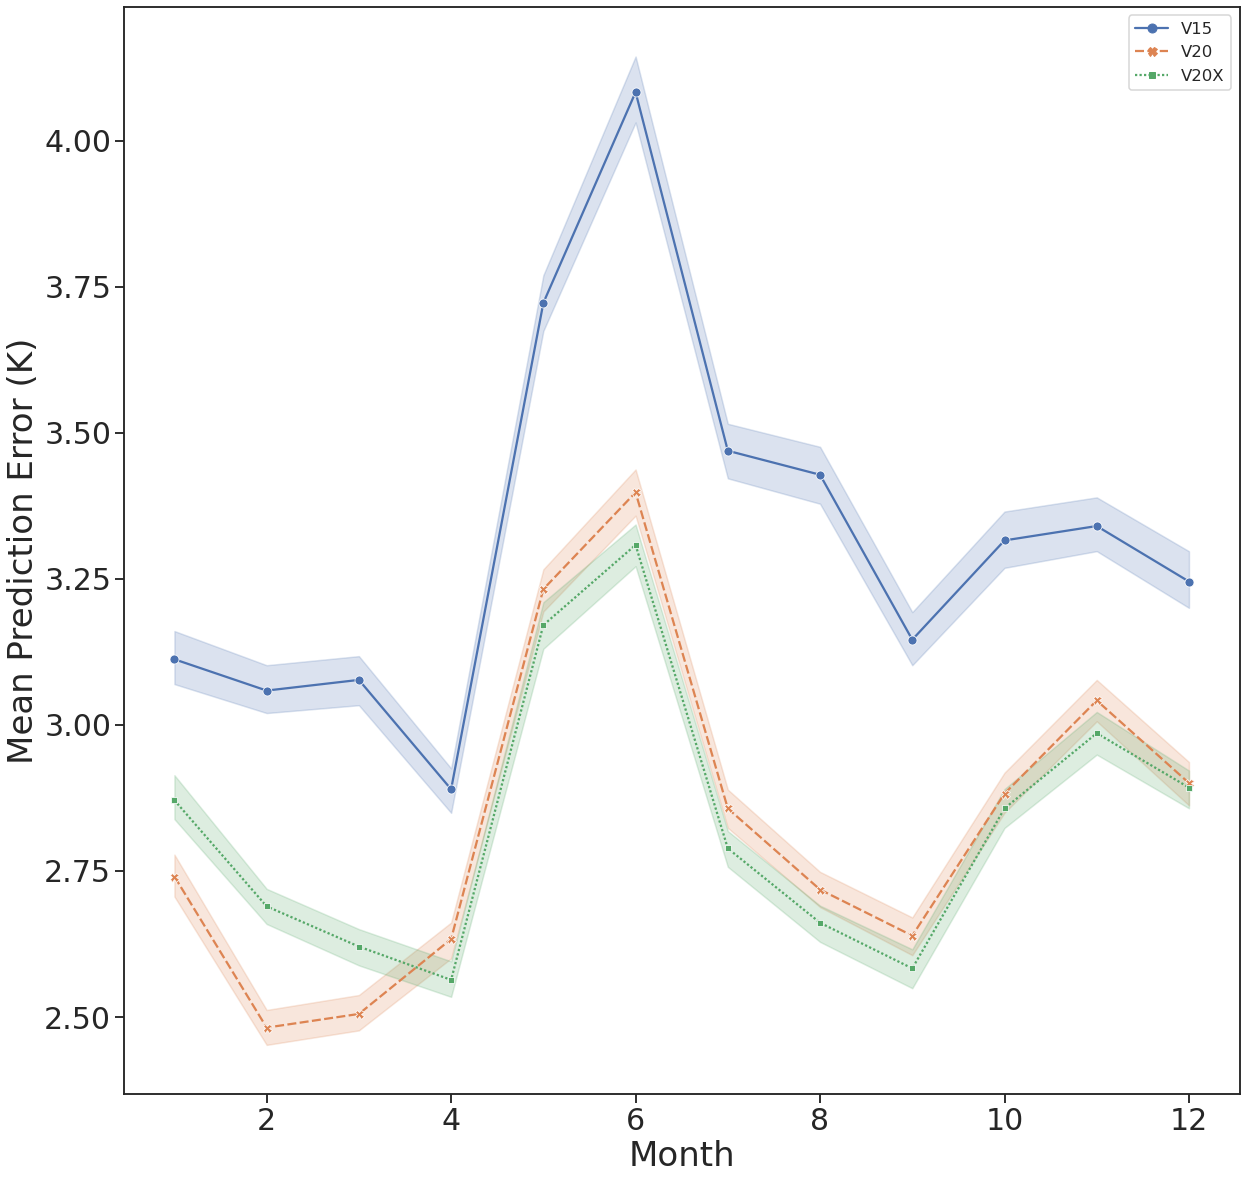

In [31]:
plot_timeseries(df_timeseries_categorized.query('model != "V15X"'),savefig=None)

In [42]:
excluded = 'clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not si10Fr_change_is_significant & (cvhFr_change_is_significant | cvlFr_change_is_significant)'
mask_ex = change_in_fields.query(excluded)
df_timeseries_categorized_ex = pd.merge(df_timeseries,mask_ex,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_ex = df_timeseries_categorized_ex.reset_index()

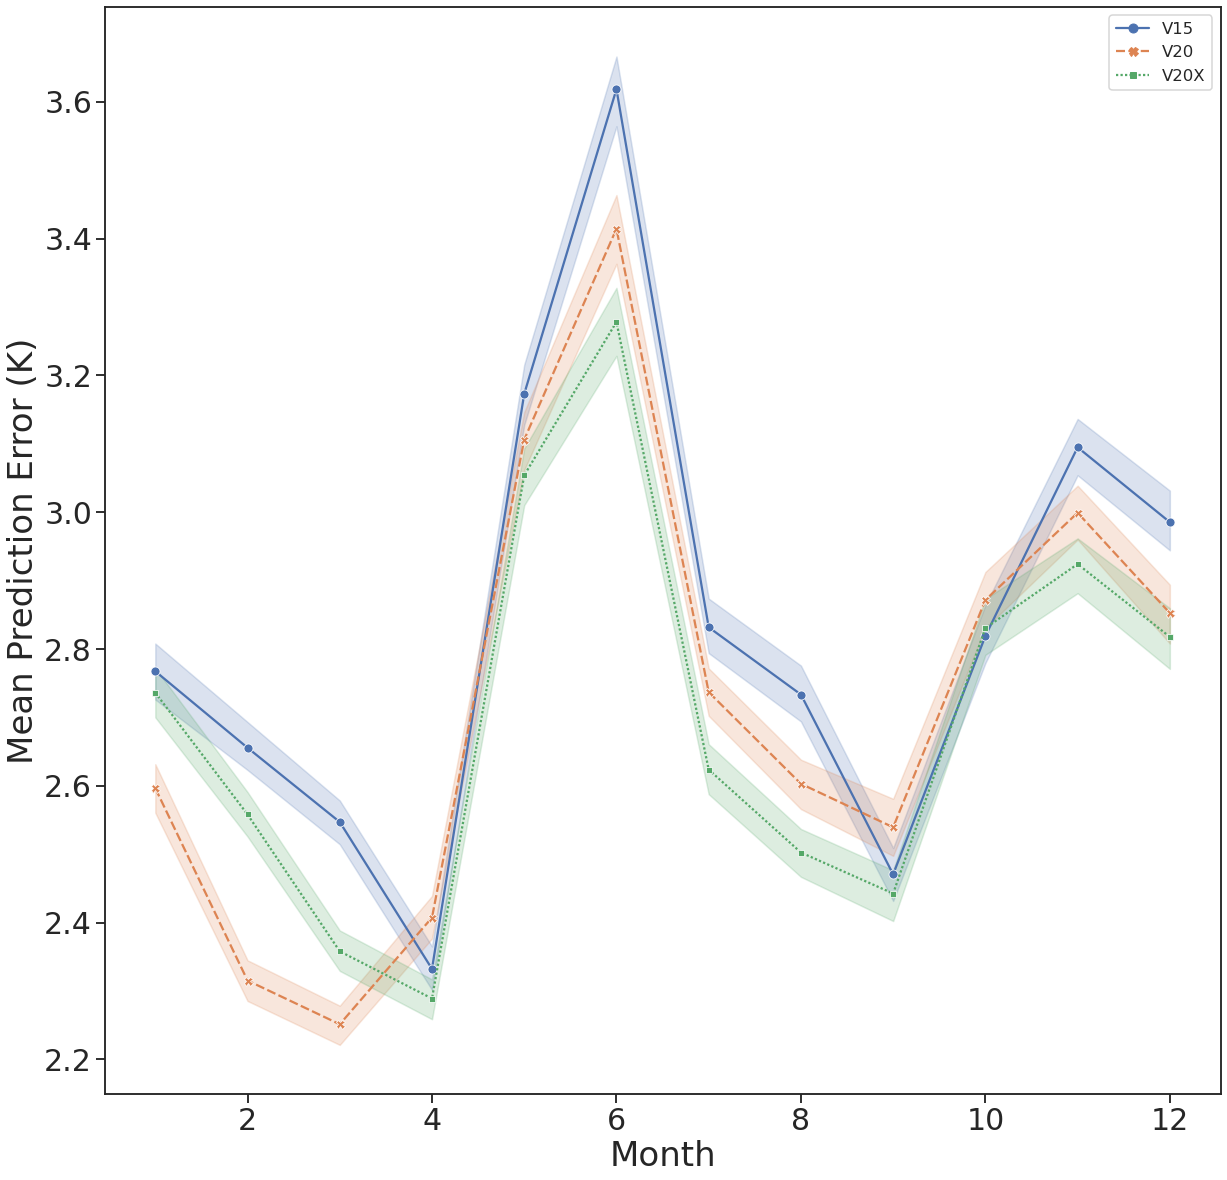

In [43]:
plot_timeseries(df_timeseries_categorized_ex.query('model != "V15X"'),savefig=None)

## Strong lake category, no veg

In [32]:
#Create a mask to filter by
lake_condition_strong = 'clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant'
mask_strong = change_in_fields.query(lake_condition_strong)
df_timeseries_categorized_LS = pd.merge(df_timeseries,mask_strong,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_LS = df_timeseries_categorized_LS.reset_index()


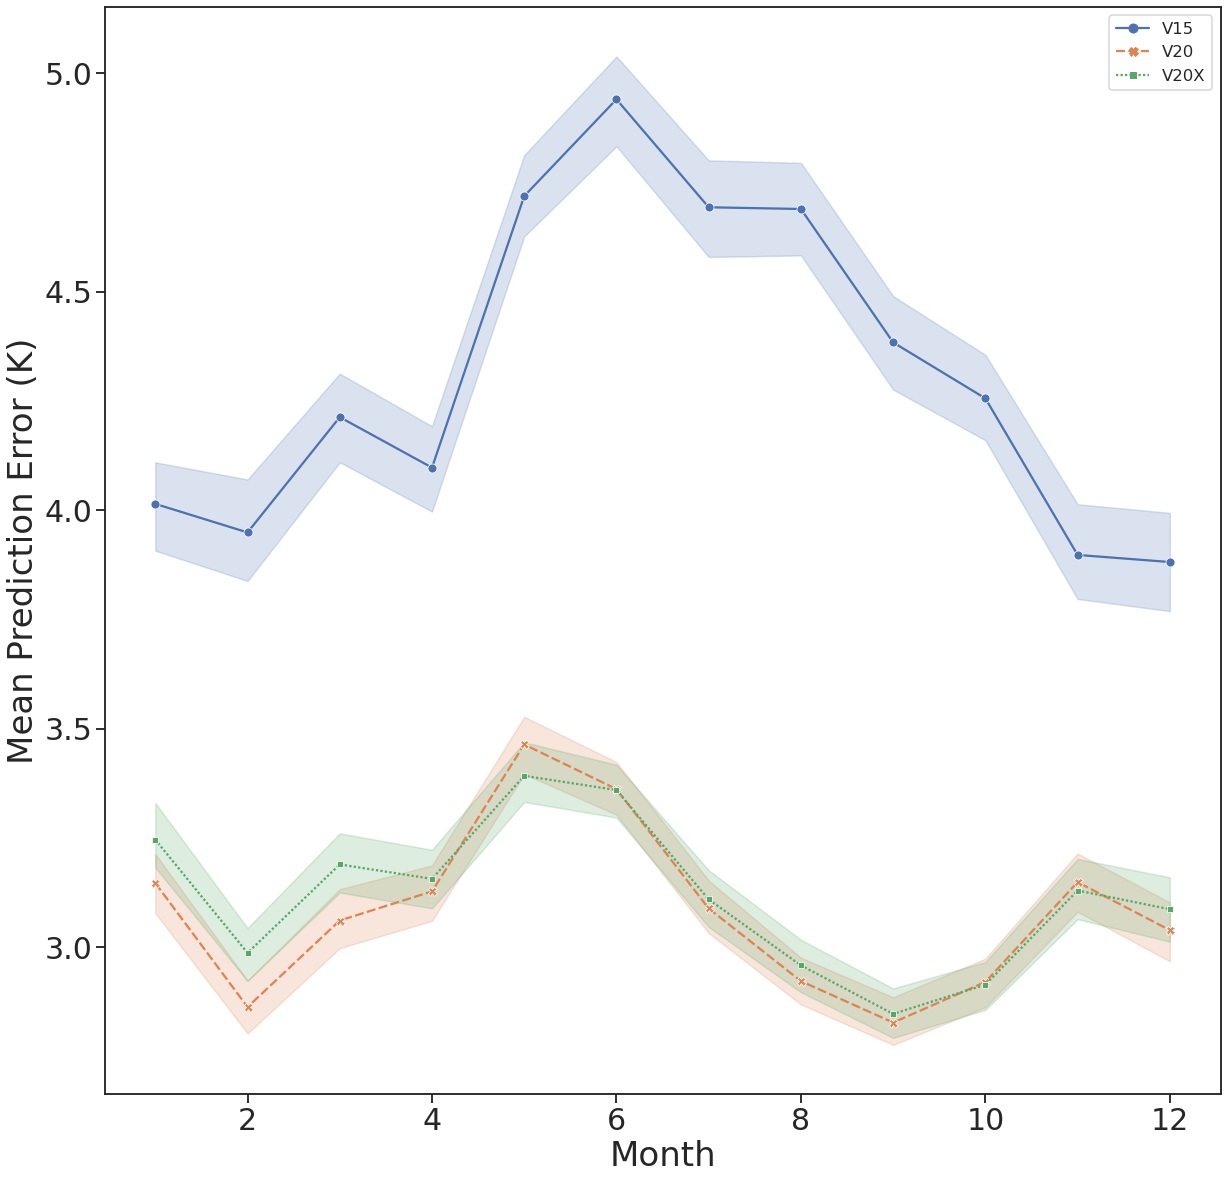

In [33]:
plot_timeseries(df_timeseries_categorized_LS.query('model != "V15X"'),savefig=None)

## Vegetation

In [34]:
#Create a mask to filter by
veg_condition = 'cvhFr_change_is_significant & not clFr_change_is_significant'
mask_veg = change_in_fields.query(veg_condition)
df_timeseries_categorized_veg = pd.merge(df_timeseries,mask_veg,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_veg = df_timeseries_categorized_veg.reset_index()


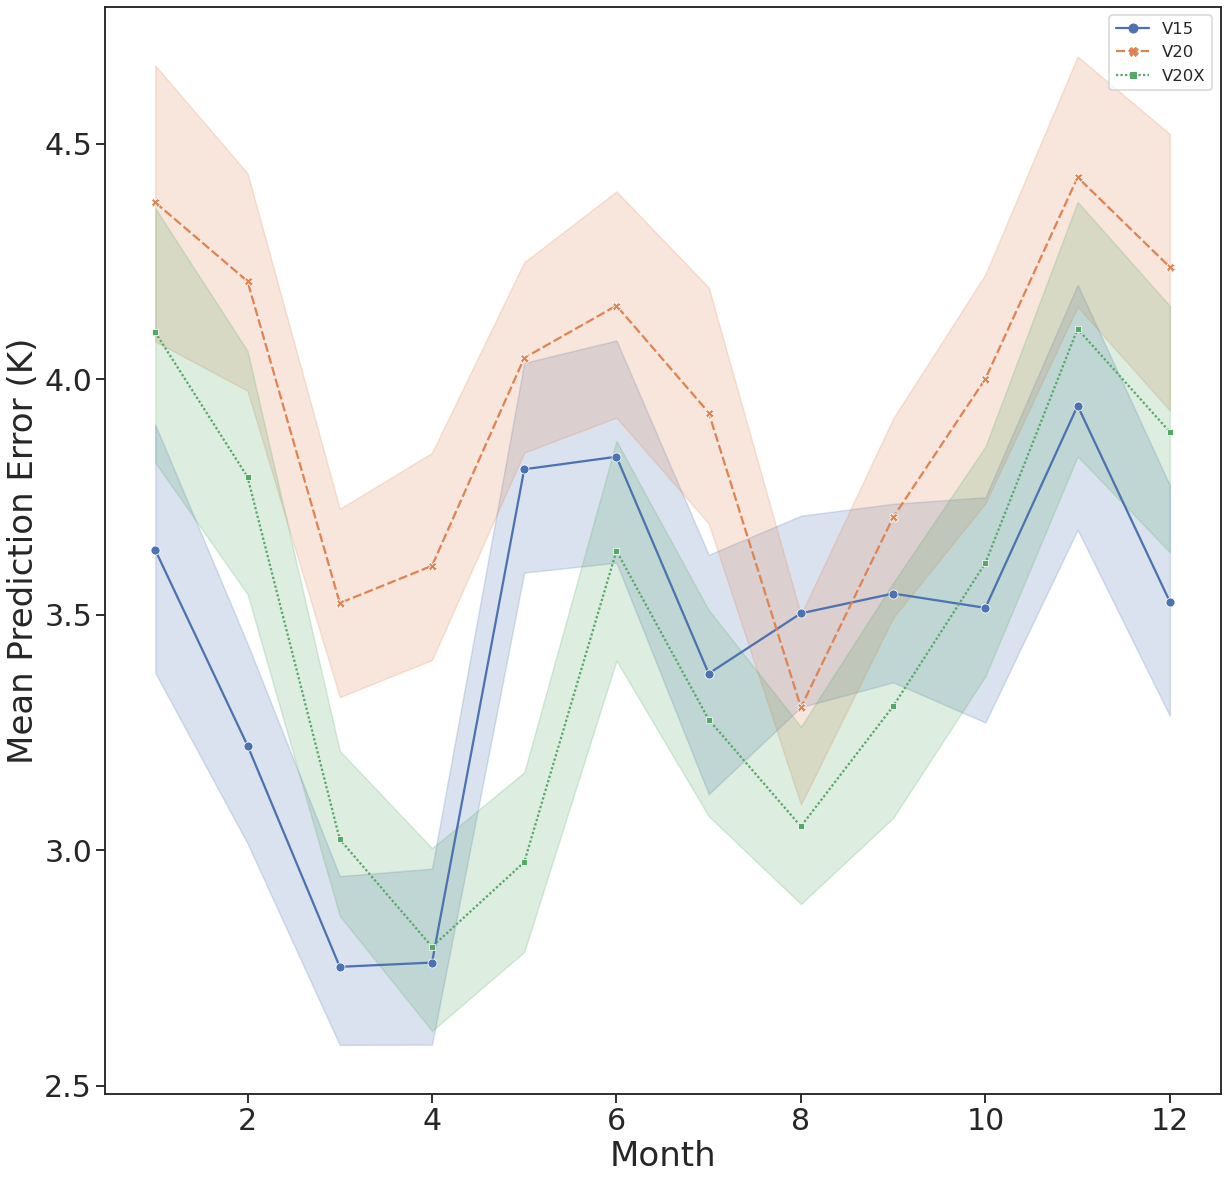

In [35]:
plot_timeseries(df_timeseries_categorized_veg.query('model != "V15X"'),savefig=None)

## Glacier

In [55]:
#Create a mask to filter by
glacier_condition = 'si10Fr_change_is_significant'
mask_glacier = change_in_fields.query(glacier_condition)
df_timeseries_categorized_glacier = pd.merge(df_timeseries,mask_glacier,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_glacier = df_timeseries_categorized_glacier.reset_index()


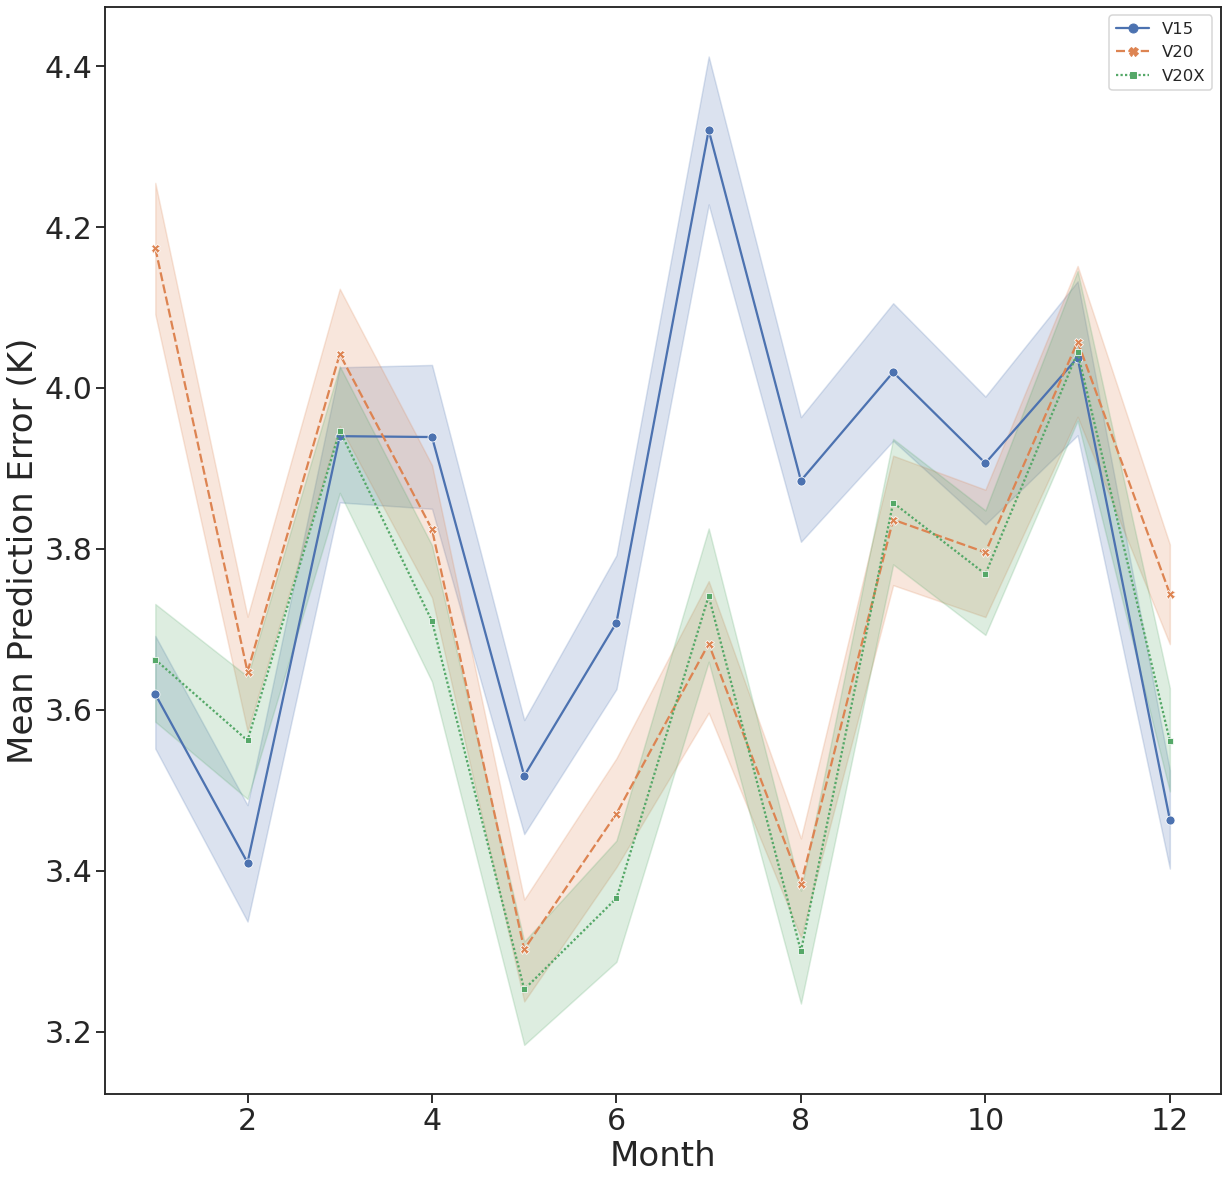

In [56]:
plot_timeseries(df_timeseries_categorized_glacier.query('model != "V15X" & number_of_modis_observations > 50'),savefig=None)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


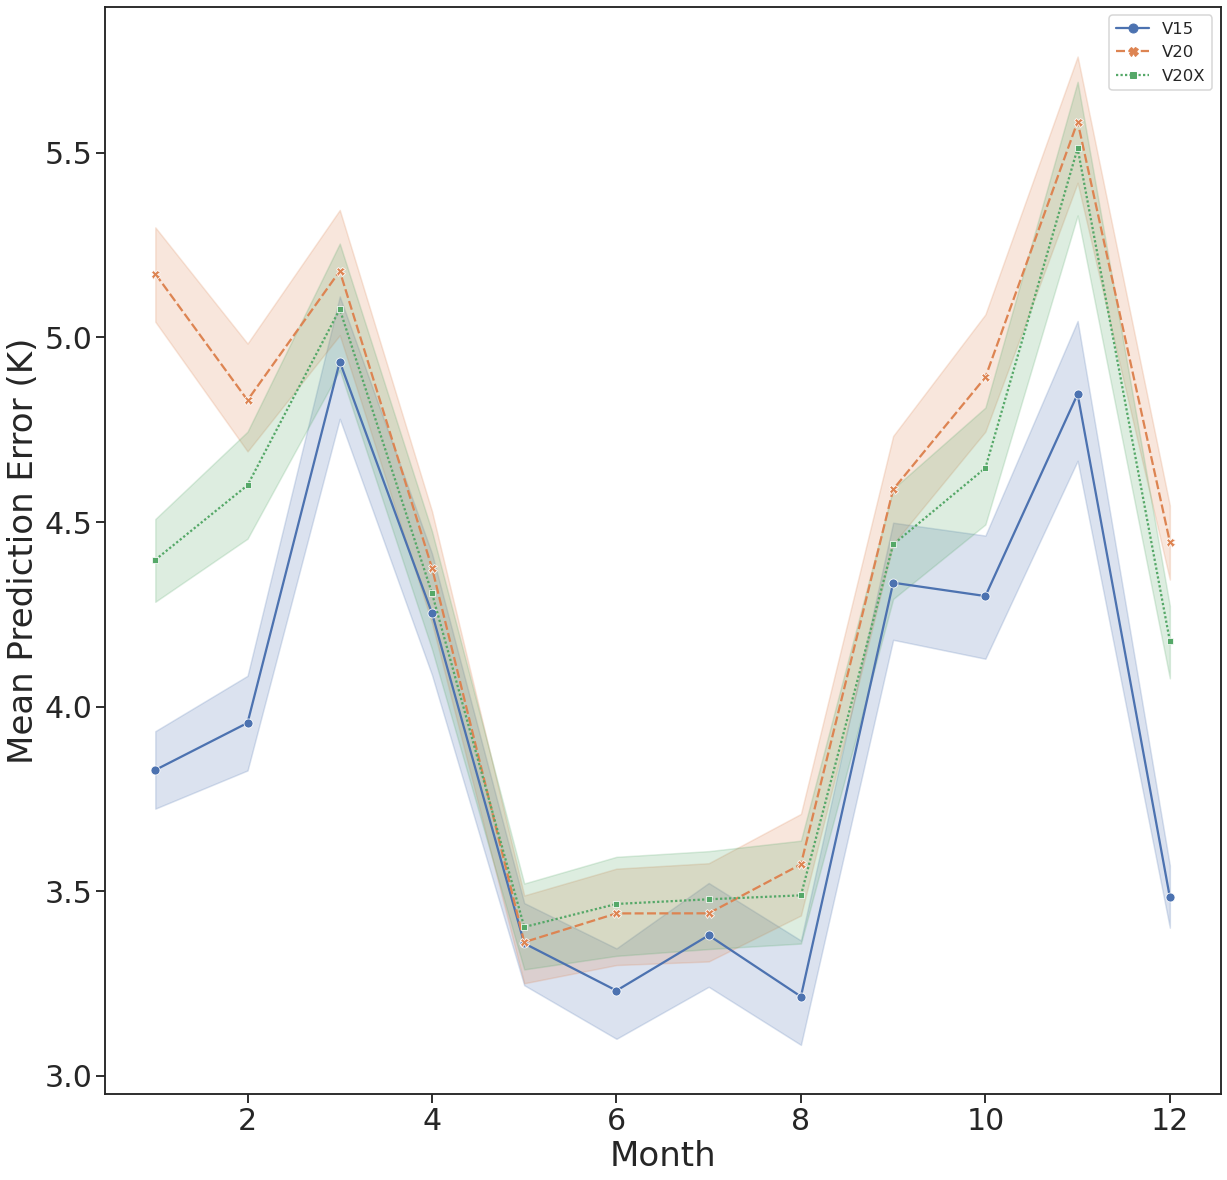

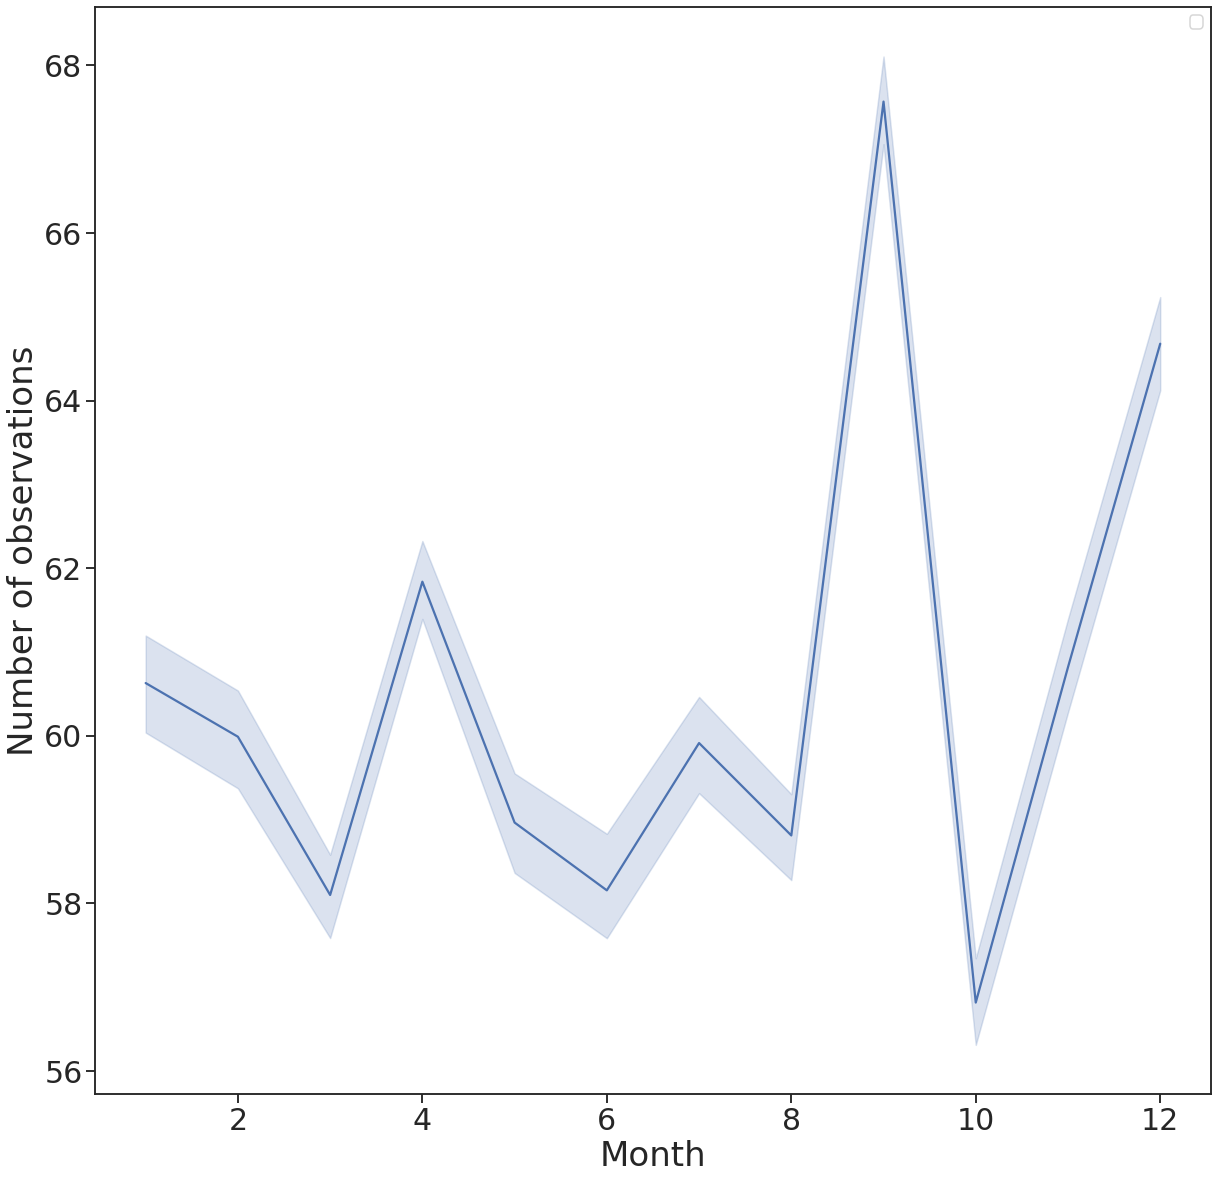

In [57]:
#Create a mask to filter by
glacier_condition_south = 'si10Fr_change_is_significant & latitude_ERA < 0.0'
mask_glacier_south = change_in_fields.query(glacier_condition_south)
df_timeseries_categorized_glacier_south = pd.merge(df_timeseries,mask_glacier_south,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_glacier_south = df_timeseries_categorized_glacier_south.reset_index()
plot_timeseries(df_timeseries_categorized_glacier_south.query('model != "V15X" & number_of_modis_observations > 50'),savefig=None)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


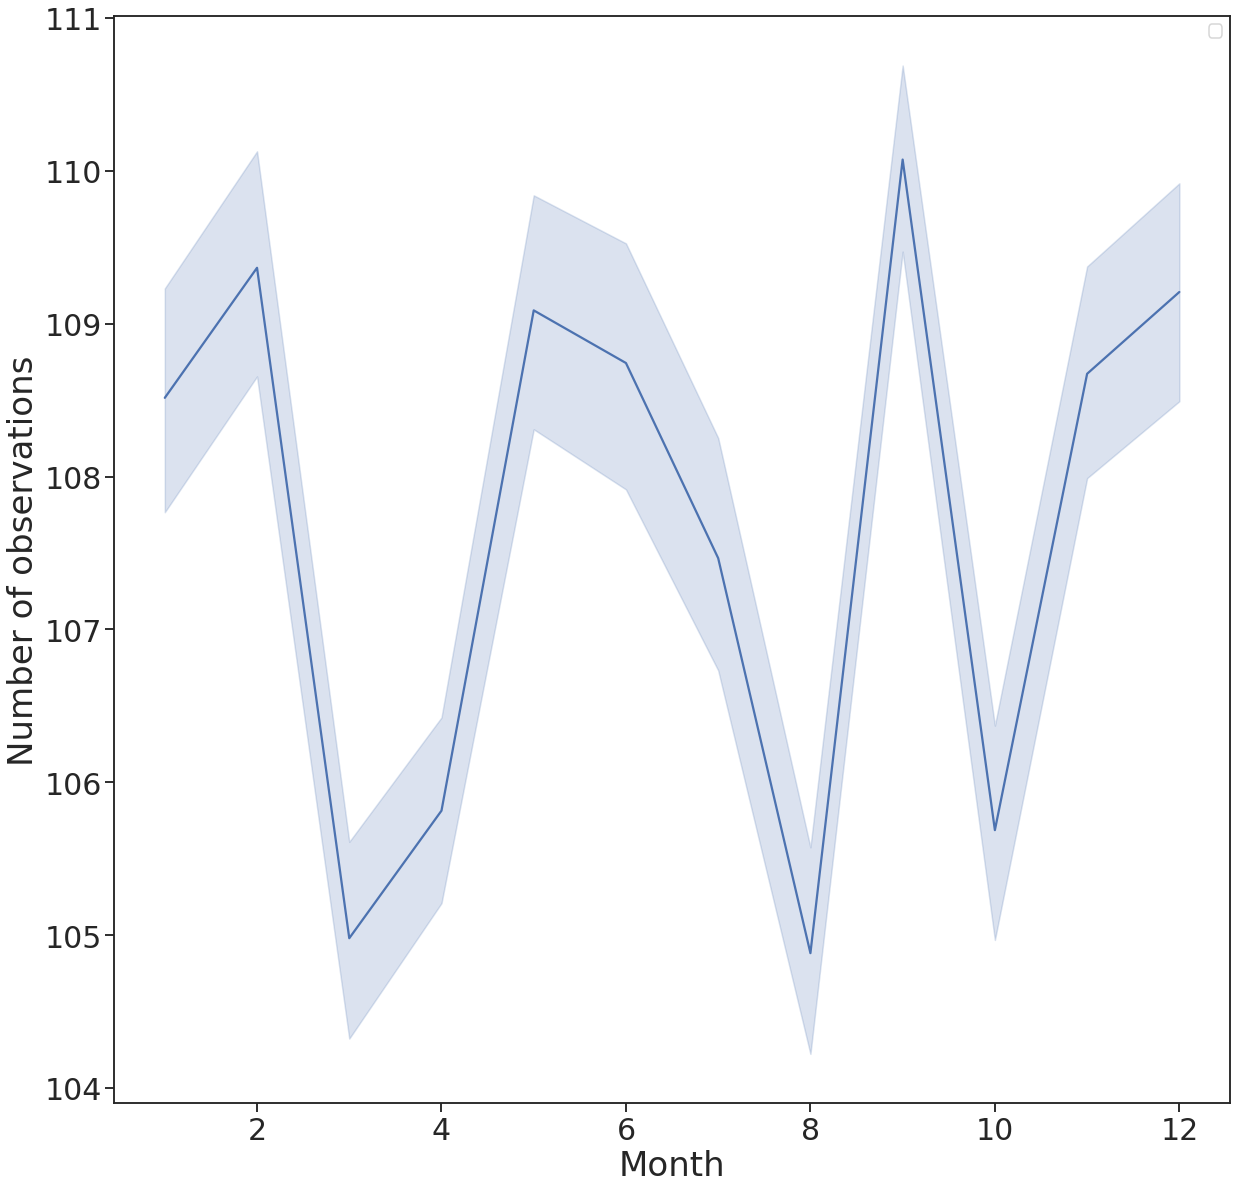

In [74]:
plot_num_obs(df_timeseries_categorized_glacier_south.query('model != "V15X" & number_of_modis_observations > 50'),savefig=None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


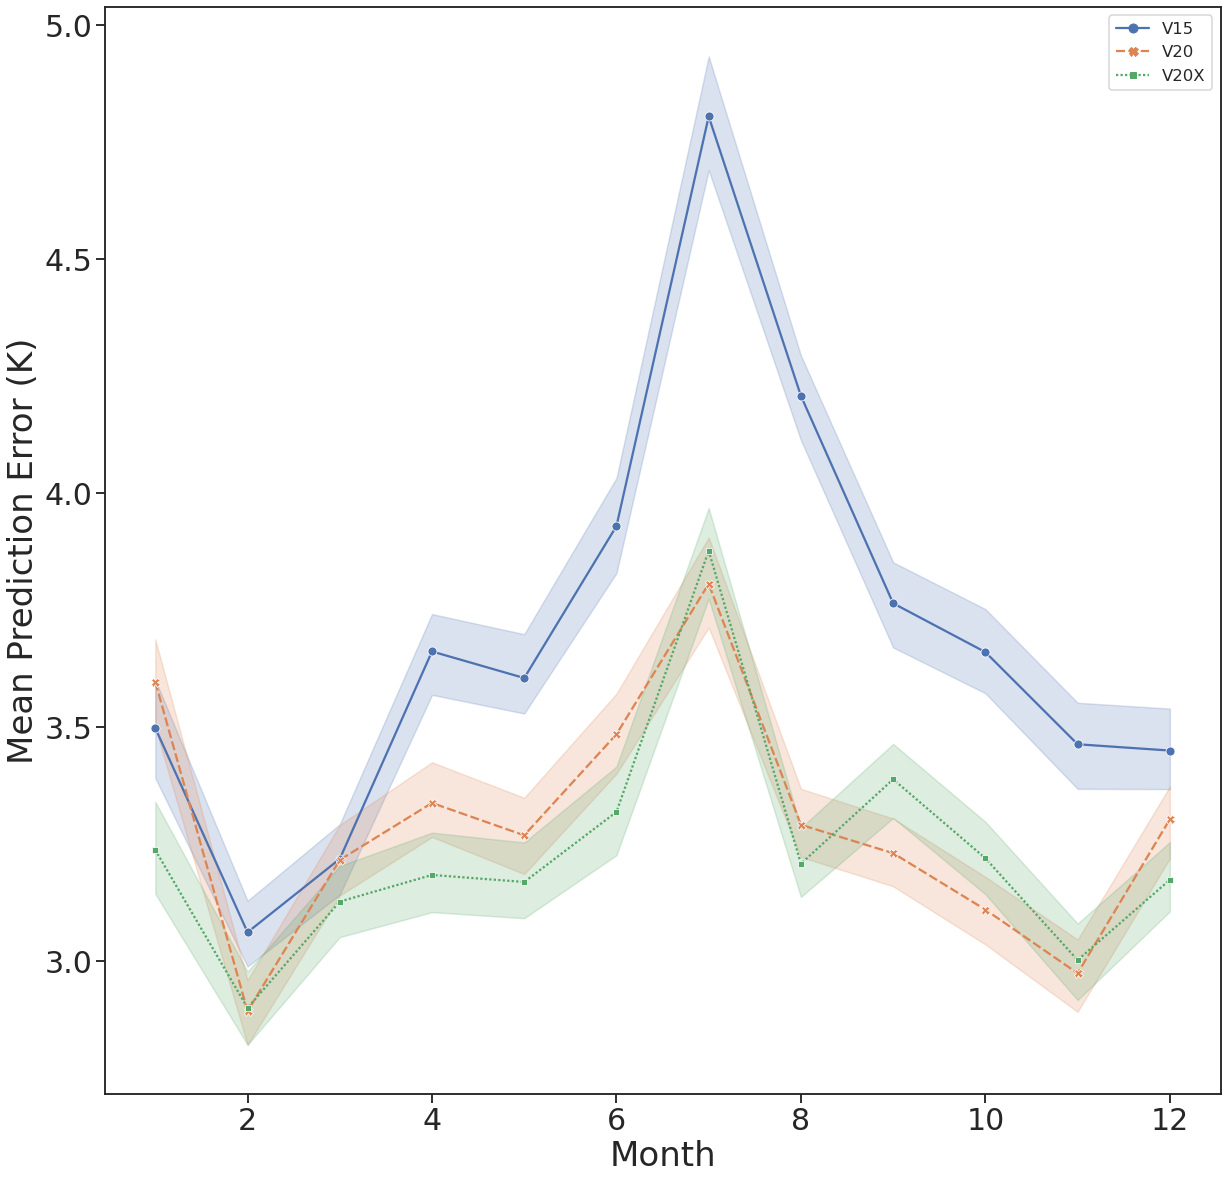

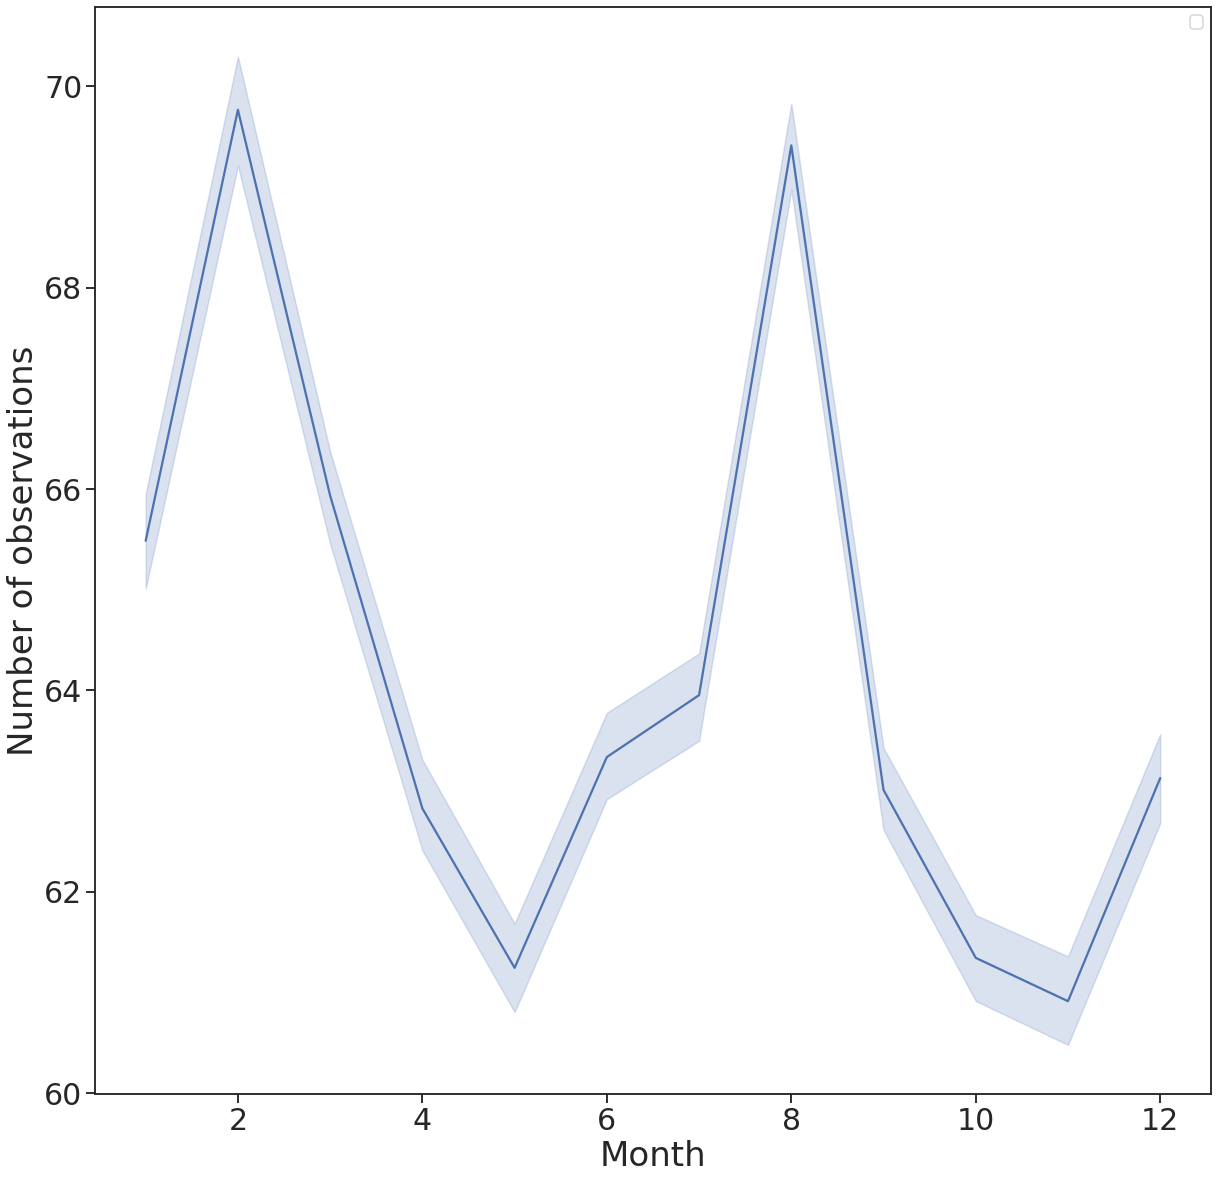

In [58]:
#Create a mask to filter by
glacier_condition_north = 'si10Fr_change_is_significant & latitude_ERA > 0.0'
mask_glacier_north = change_in_fields.query(glacier_condition_north)
df_timeseries_categorized_glacier_north = pd.merge(df_timeseries,mask_glacier_north,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_glacier_north = df_timeseries_categorized_glacier_north.reset_index()
plot_timeseries(df_timeseries_categorized_glacier_north.query('model != "V15X" & number_of_modis_observations > 50'),savefig=None)
plot_num_obs(df_timeseries_categorized_glacier_north,savefig=None)

# Stacked plots

In [65]:
def plot_mega_stacked_timeseries(df1,df2,df3,df4,df5,savefig):

    h,w = 20,2*20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(h,w),sharex=True)
    
    
    p1 = sns.lineplot(data=df1, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax1,markers=True)
    p2 = sns.lineplot(data=df2, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax2,markers=True,legend=False)
    p3 = sns.lineplot(data=df3, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax3,markers=True,legend=False)
    p4 = sns.lineplot(data=df4, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax4,markers=True,legend=False)
    p5 = sns.lineplot(data=df5, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax5,markers=True,legend=False)

    
    
    # ALL AXES
    for ax in [ax1,ax2,ax3,ax4,ax5]:
        ax.set_ylabel(r"$\bar{\Delta} K$",fontsize=34)
        ax.tick_params(labelsize=30)
        
        
    for ax in [ax1,ax2,ax3,ax4]:
        ax.tick_params(
                      axis='x',          # changes apply to the x-axis
                      which='both',      # both major and minor ticks are affected
                      bottom=False,      # ticks along the bottom edge are off
                      top=False,         # ticks along the top edge are off
                      labelbottom=False) # labels along the bottom edge are o


        
    # AX1
    ax1.legend().set_title(None)
            
    #AX4    
    ax5.set_xlabel("Month",fontsize=34)

    
    plt.subplots_adjust(wspace=0.01, hspace=0.01)


    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    

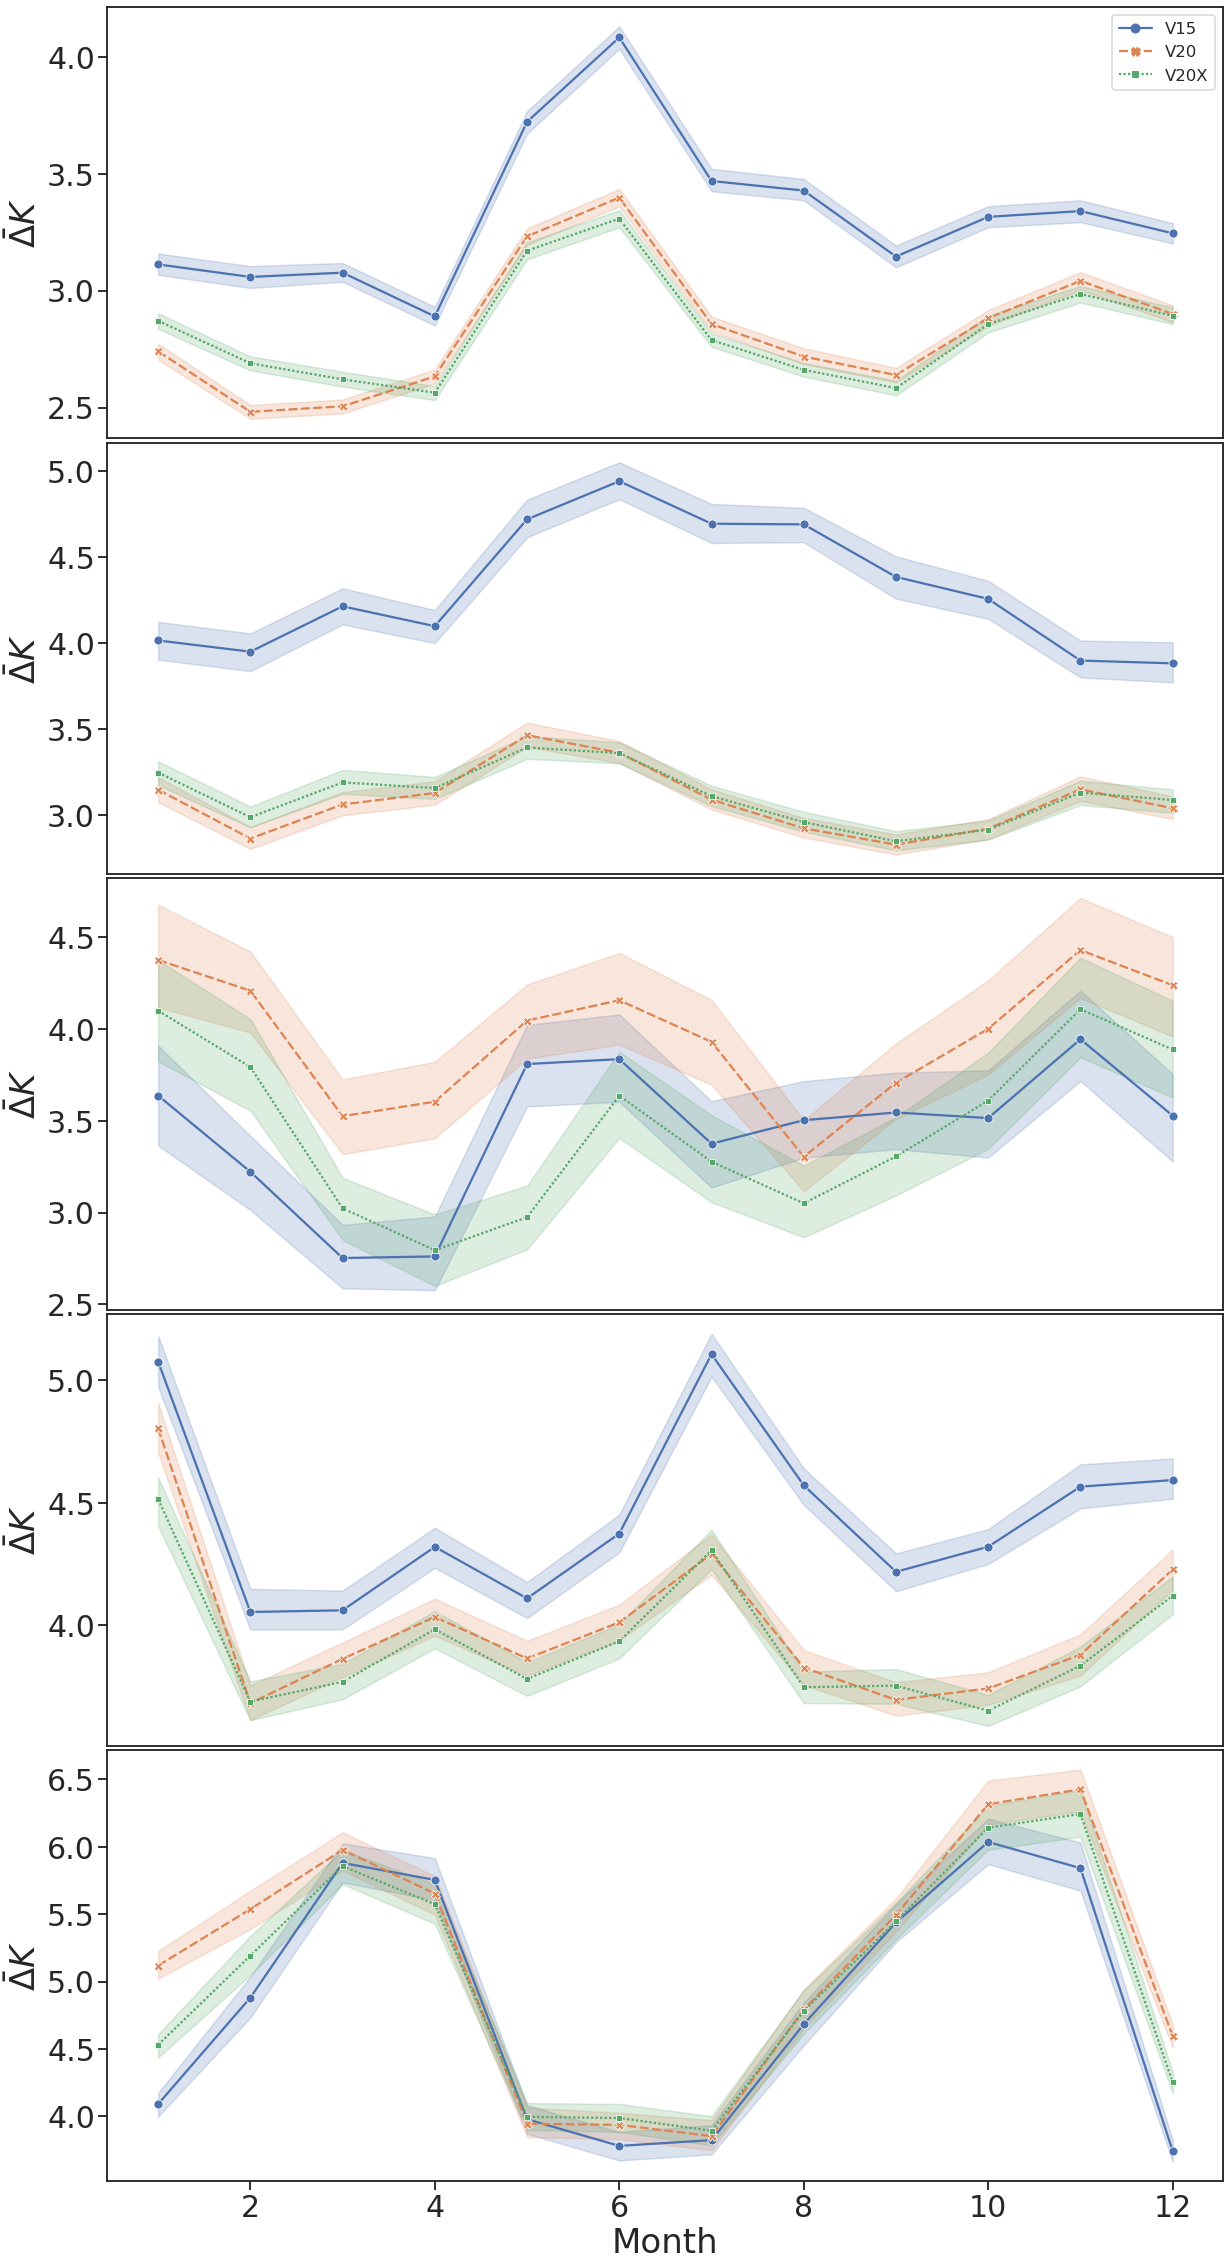

In [66]:





df1 = df_timeseries_categorized.query('model != "V15X"')
df2 = df_timeseries_categorized_LS.query('model != "V15X"')
df3 = df_timeseries_categorized_veg.query('model != "V15X"')
df4 = df_timeseries_categorized_glacier_north.query('model != "V15X"')
df5 = df_timeseries_categorized_glacier_south.query('model != "V15X"')


plot_mega_stacked_timeseries(df1,df2,df3,df4,df5,savefig='figs/mega_stack.png')

---

## Particular points

index  latitude_ERA  longitude_ERA                time   MODIS_LST  \
0       96138     41.170945         -113.4 2019-01-01 21:00:00  270.650543   
1      196081     41.170945         -113.4 2019-01-02 21:00:00  269.642426   
2      298114     41.170945         -113.4 2019-01-03 21:00:00  271.877686   
3      395546     41.170945         -113.4 2019-01-04 21:00:00  268.344635   
4      590945     41.170945         -113.4 2019-01-06 21:00:00  270.150085   
...       ...           ...            ...                 ...         ...   
1139  2504336     41.170945         -113.4 2019-12-25 21:00:00  272.292847   
1140  2607199     41.170945         -113.4 2019-12-26 21:00:00  277.239227   
1141  2711190     41.170945         -113.4 2019-12-27 21:00:00  274.933105   
1142  2808859     41.170945         -113.4 2019-12-28 21:00:00  275.483765   
1143  3107314     41.170945         -113.4 2019-12-31 21:00:00  272.214783   

      skt_unnormalised  number_of_modis_observations  predictions  \
0           268.403931                            60   268.562592   
1           269.367554                            61   268.182495   
2           269.641449                            65   267.725342   
3           269.426086                            24   267.155365   
4           273.149811                            15   272.870728   
...                ...                           ...          ...   
1139        273.124023                            18   270.619812   
1140        272.434174                            56   272.334259   
1141        272.712738                            80   271.560394   
1142        273.144714                            37   274.502350   
1143        273.149963                             7   273.215363   

      predicion_bias  predicion_error model  latitude_join  longitude_join  \
0           2.087952         2.087952   V15         41.171          -113.4   
1           1.459930         1.459930   V15         41.171          -113.4   
2           4.152344         4.152344   V15         41.171          -113.4   
3           1.189270         1.189270   V15         41.171          -113.4   
4          -2.720642         2.720642   V15         41.171          -113.4   
...              ...              ...   ...            ...             ...   
1139        1.673035         1.673035  V15X         41.171          -113.4   
1140        4.904968         4.904968  V15X         41.171          -113.4   
1141        3.372711         3.372711  V15X         41.171          -113.4   
1142        0.981415         0.981415  V15X         41.171          -113.4   
1143       -1.000580         1.000580  V15X         41.171          -113.4   

      month         day  
0         1  2019-01-01  
1         1  2019-01-02  
2         1  2019-01-03  
3         1  2019-01-04  
4         1  2019-01-06  
...     ...         ...  
1139     12  2019-12-25  
1140     12  2019-12-26  
1141     12  2019-12-27  
1142     12  2019-12-28  
1143     12  2019-12-31  

[1144 rows x 15 columns]

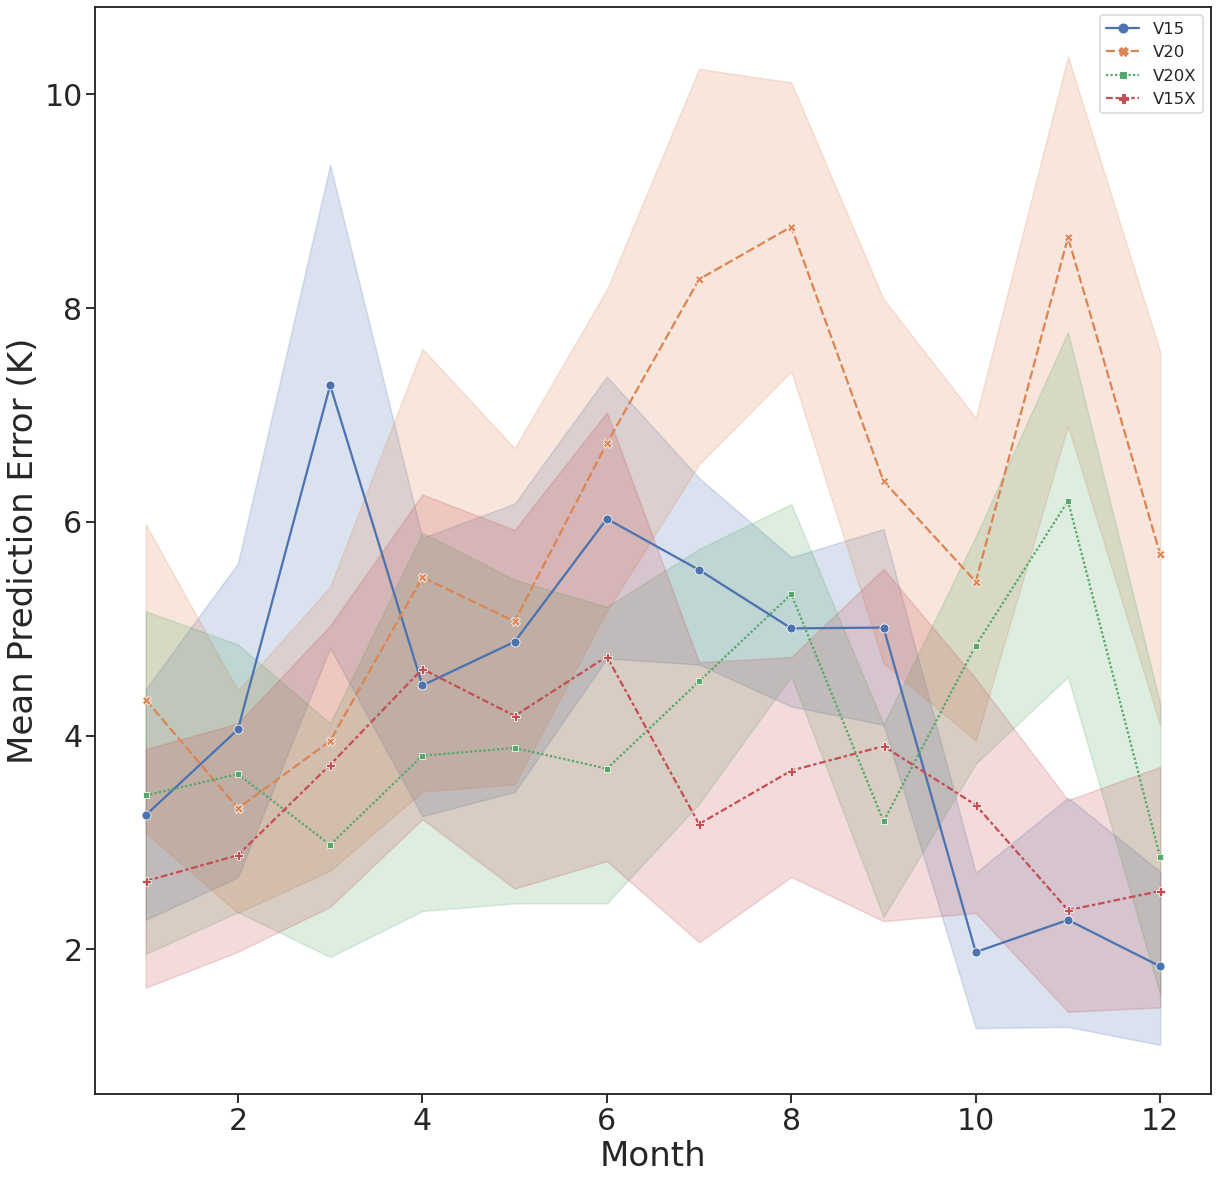

In [90]:
#Salt lake city
lat = 41.17094491970063
lon = -113.39999999999998
df_selected = df_timeseries.query(f'latitude_ERA == {lat} & longitude_ERA == {lon}').reset_index()
display(df_selected)
plot_timeseries(df_selected,savefig=None)

index  latitude_ERA  longitude_ERA                time   MODIS_LST  \
0       44959     -2.388758           36.0 2019-01-01 11:00:00  312.419647   
1      144105     -2.388758           36.0 2019-01-02 11:00:00  315.001099   
2      243820     -2.388758           36.0 2019-01-03 11:00:00  311.812683   
3      344949     -2.388758           36.0 2019-01-04 11:00:00  316.518982   
4      544992     -2.388758           36.0 2019-01-06 11:00:00  318.131622   
...       ...           ...            ...                 ...         ...   
1087  2661567     -2.388758           36.0 2019-12-27 11:00:00  312.782043   
1088  2760183     -2.388758           36.0 2019-12-28 11:00:00  305.254944   
1089  2858895     -2.388758           36.0 2019-12-29 11:00:00  308.333649   
1090  2953406     -2.388758           36.0 2019-12-30 11:00:00  306.590302   
1091  3054939     -2.388758           36.0 2019-12-31 11:00:00  310.051147   

      skt_unnormalised  number_of_modis_observations  predictions  \
0           329.478699                            72   320.593811   
1           329.555969                            72   320.767029   
2           330.155762                            71   321.331390   
3           325.004059                            10   318.725769   
4           331.237000                            33   321.265533   
...                ...                           ...          ...   
1087        312.488220                             3   309.916107   
1088        306.173401                            52   305.520416   
1089        308.798401                            45   307.774017   
1090        312.160797                            71   309.826874   
1091        315.265167                            72   311.946991   

      predicion_bias  predicion_error model  latitude_join  longitude_join  \
0          -8.174164         8.174164   V15         -2.389            36.0   
1          -5.765930         5.765930   V15         -2.389            36.0   
2          -9.518707         9.518707   V15         -2.389            36.0   
3          -2.206787         2.206787   V15         -2.389            36.0   
4          -3.133911         3.133911   V15         -2.389            36.0   
...              ...              ...   ...            ...             ...   
1087        2.865936         2.865936  V15X         -2.389            36.0   
1088       -0.265472         0.265472  V15X         -2.389            36.0   
1089        0.559631         0.559631  V15X         -2.389            36.0   
1090       -3.236572         3.236572  V15X         -2.389            36.0   
1091       -1.895844         1.895844  V15X         -2.389            36.0   

      month         day  
0         1  2019-01-01  
1         1  2019-01-02  
2         1  2019-01-03  
3         1  2019-01-04  
4         1  2019-01-06  
...     ...         ...  
1087     12  2019-12-27  
1088     12  2019-12-28  
1089     12  2019-12-29  
1090     12  2019-12-30  
1091     12  2019-12-31  

[1092 rows x 15 columns]

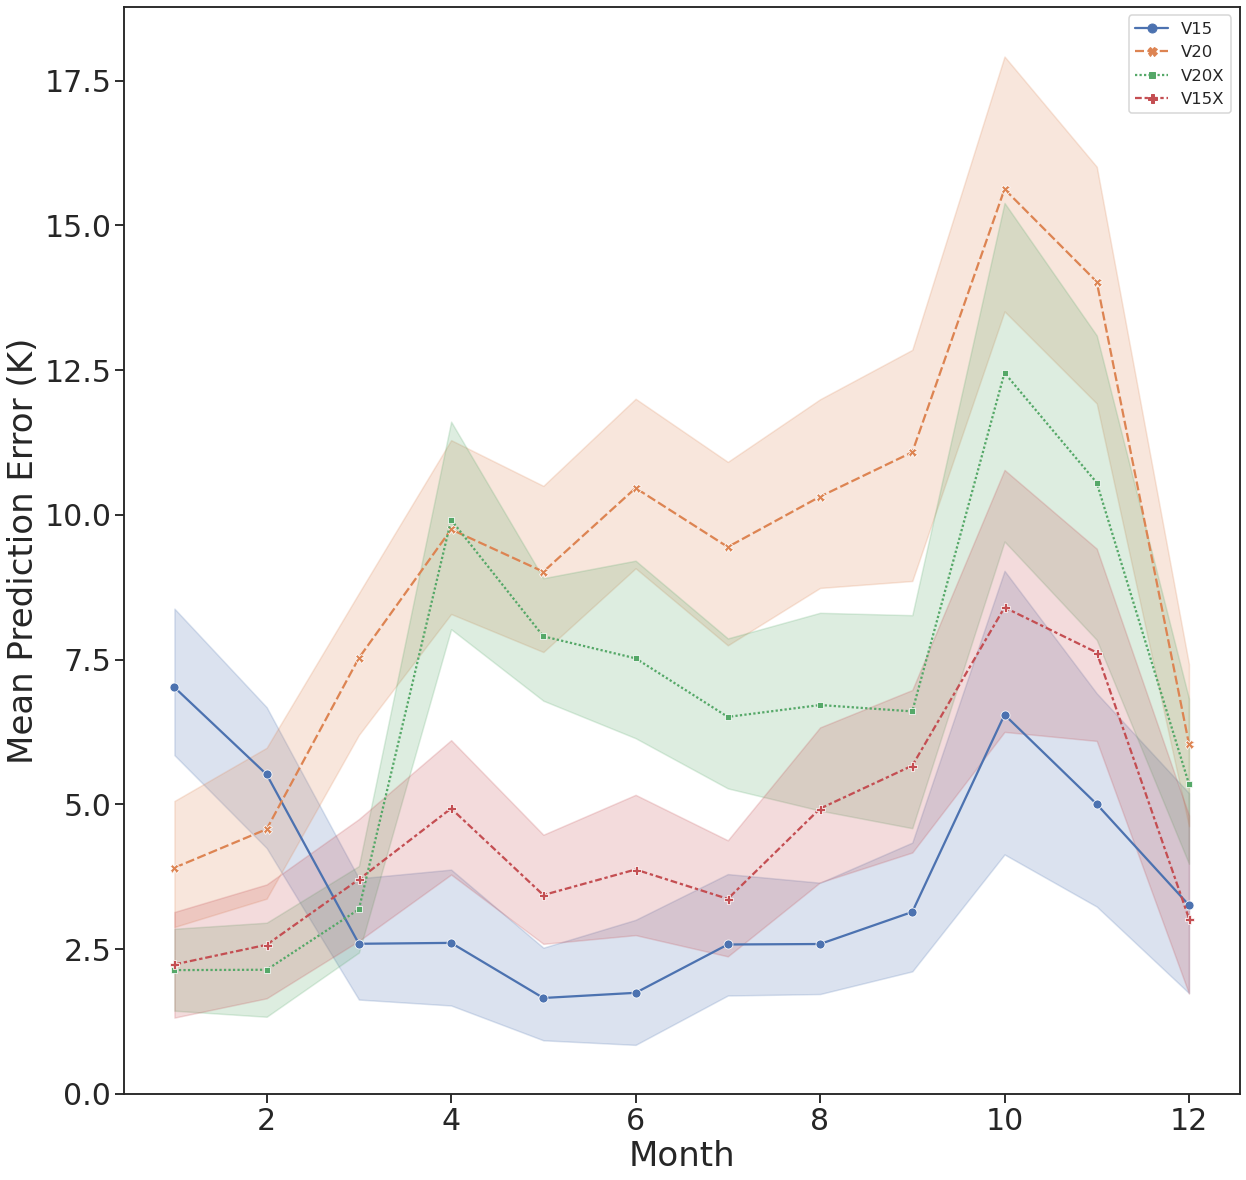

In [98]:
#Lake Natron
lat = -2.3887580539270044
lon=   36.0

df_selected = df_timeseries.query(f'latitude_ERA == {lat} & longitude_ERA == {lon}').reset_index()
display(df_selected)
plot_timeseries(df_selected,savefig='figs/lake_natron_timeseries.png')

index  latitude_ERA  longitude_ERA                time   MODIS_LST  \
0       96138     41.170945         -113.4 2019-01-01 21:00:00  270.650543   
1      196081     41.170945         -113.4 2019-01-02 21:00:00  269.642426   
2      298114     41.170945         -113.4 2019-01-03 21:00:00  271.877686   
3      395546     41.170945         -113.4 2019-01-04 21:00:00  268.344635   
4      590945     41.170945         -113.4 2019-01-06 21:00:00  270.150085   
...       ...           ...            ...                 ...         ...   
1139  2504336     41.170945         -113.4 2019-12-25 21:00:00  272.292847   
1140  2607199     41.170945         -113.4 2019-12-26 21:00:00  277.239227   
1141  2711190     41.170945         -113.4 2019-12-27 21:00:00  274.933105   
1142  2808859     41.170945         -113.4 2019-12-28 21:00:00  275.483765   
1143  3107314     41.170945         -113.4 2019-12-31 21:00:00  272.214783   

      skt_unnormalised  number_of_modis_observations  predictions  \
0           268.403931                            60   268.562592   
1           269.367554                            61   268.182495   
2           269.641449                            65   267.725342   
3           269.426086                            24   267.155365   
4           273.149811                            15   272.870728   
...                ...                           ...          ...   
1139        273.124023                            18   270.619812   
1140        272.434174                            56   272.334259   
1141        272.712738                            80   271.560394   
1142        273.144714                            37   274.502350   
1143        273.149963                             7   273.215363   

      predicion_bias  predicion_error model  latitude_join  longitude_join  \
0           2.087952         2.087952   V15         41.171          -113.4   
1           1.459930         1.459930   V15         41.171          -113.4   
2           4.152344         4.152344   V15         41.171          -113.4   
3           1.189270         1.189270   V15         41.171          -113.4   
4          -2.720642         2.720642   V15         41.171          -113.4   
...              ...              ...   ...            ...             ...   
1139        1.673035         1.673035  V15X         41.171          -113.4   
1140        4.904968         4.904968  V15X         41.171          -113.4   
1141        3.372711         3.372711  V15X         41.171          -113.4   
1142        0.981415         0.981415  V15X         41.171          -113.4   
1143       -1.000580         1.000580  V15X         41.171          -113.4   

      month         day  
0         1  2019-01-01  
1         1  2019-01-02  
2         1  2019-01-03  
3         1  2019-01-04  
4         1  2019-01-06  
...     ...         ...  
1139     12  2019-12-25  
1140     12  2019-12-26  
1141     12  2019-12-27  
1142     12  2019-12-28  
1143     12  2019-12-31  

[1144 rows x 15 columns]

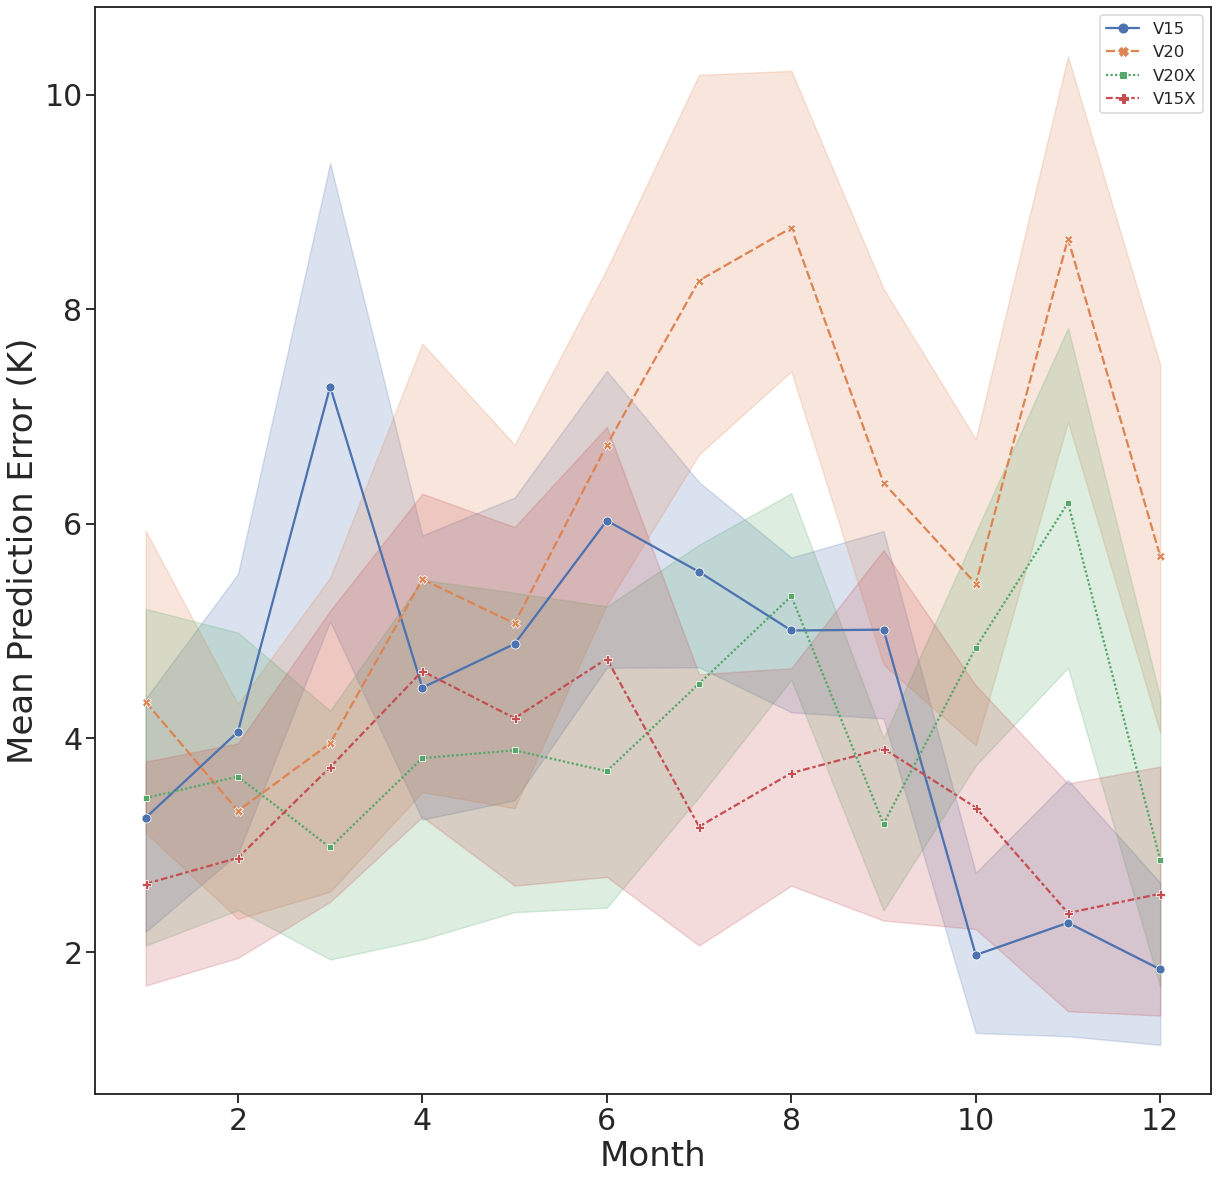

In [93]:
#Australia

lat = round(41.17094491970063,3)
lon =  round(-113.4,3)
df_selected = df_timeseries.query(f'latitude_join == {lat} & longitude_join == {lon}').reset_index()
display(df_selected)
plot_timeseries(df_selected,savefig=None)

index  latitude_ERA  longitude_ERA                time   MODIS_LST  \
0       35386     31.615914          61.12 2019-01-01 09:00:00  301.954041   
1      135157     31.615914          61.12 2019-01-02 09:00:00  296.644867   
2      235827     31.615914          61.12 2019-01-03 09:00:00  296.299988   
3      334814     31.615914          61.12 2019-01-04 09:00:00  301.663452   
4      434859     31.615914          61.12 2019-01-05 09:00:00  303.759491   
...       ...           ...            ...                 ...         ...   
1307  2650438     31.615914          61.12 2019-12-27 09:00:00  300.148254   
1308  2751491     31.615914          61.12 2019-12-28 09:00:00  302.491974   
1309  2849328     31.615914          61.12 2019-12-29 09:00:00  301.452301   
1310  2943989     31.615914          61.12 2019-12-30 09:00:00  299.357269   
1311  3045535     31.615914          61.12 2019-12-31 09:00:00  300.878601   

      skt_unnormalised  number_of_modis_observations  predictions  \
0           302.362061                            70   302.012756   
1           299.492859                            51   299.841431   
2           299.750244                            12   299.983734   
3           299.904358                            68   301.358490   
4           299.142181                            74   299.621552   
...                ...                           ...          ...   
1307        298.769348                            72   299.943939   
1308        299.975891                            70   301.138947   
1309        299.447235                            65   300.821136   
1310        298.167847                            69   299.675140   
1311        300.558838                            66   301.704742   

      predicion_bias  predicion_error model  latitude_join  longitude_join  \
0          -0.058716         0.058716   V15         31.616           61.12   
1          -3.196564         3.196564   V15         31.616           61.12   
2          -3.683746         3.683746   V15         31.616           61.12   
3           0.304962         0.304962   V15         31.616           61.12   
4           4.137939         4.137939   V15         31.616           61.12   
...              ...              ...   ...            ...             ...   
1307        0.204315         0.204315  V15X         31.616           61.12   
1308        1.353027         1.353027  V15X         31.616           61.12   
1309        0.631165         0.631165  V15X         31.616           61.12   
1310       -0.317871         0.317871  V15X         31.616           61.12   
1311       -0.826141         0.826141  V15X         31.616           61.12   

      month         day  
0         1  2019-01-01  
1         1  2019-01-02  
2         1  2019-01-03  
3         1  2019-01-04  
4         1  2019-01-05  
...     ...         ...  
1307     12  2019-12-27  
1308     12  2019-12-28  
1309     12  2019-12-29  
1310     12  2019-12-30  
1311     12  2019-12-31  

[1312 rows x 15 columns]

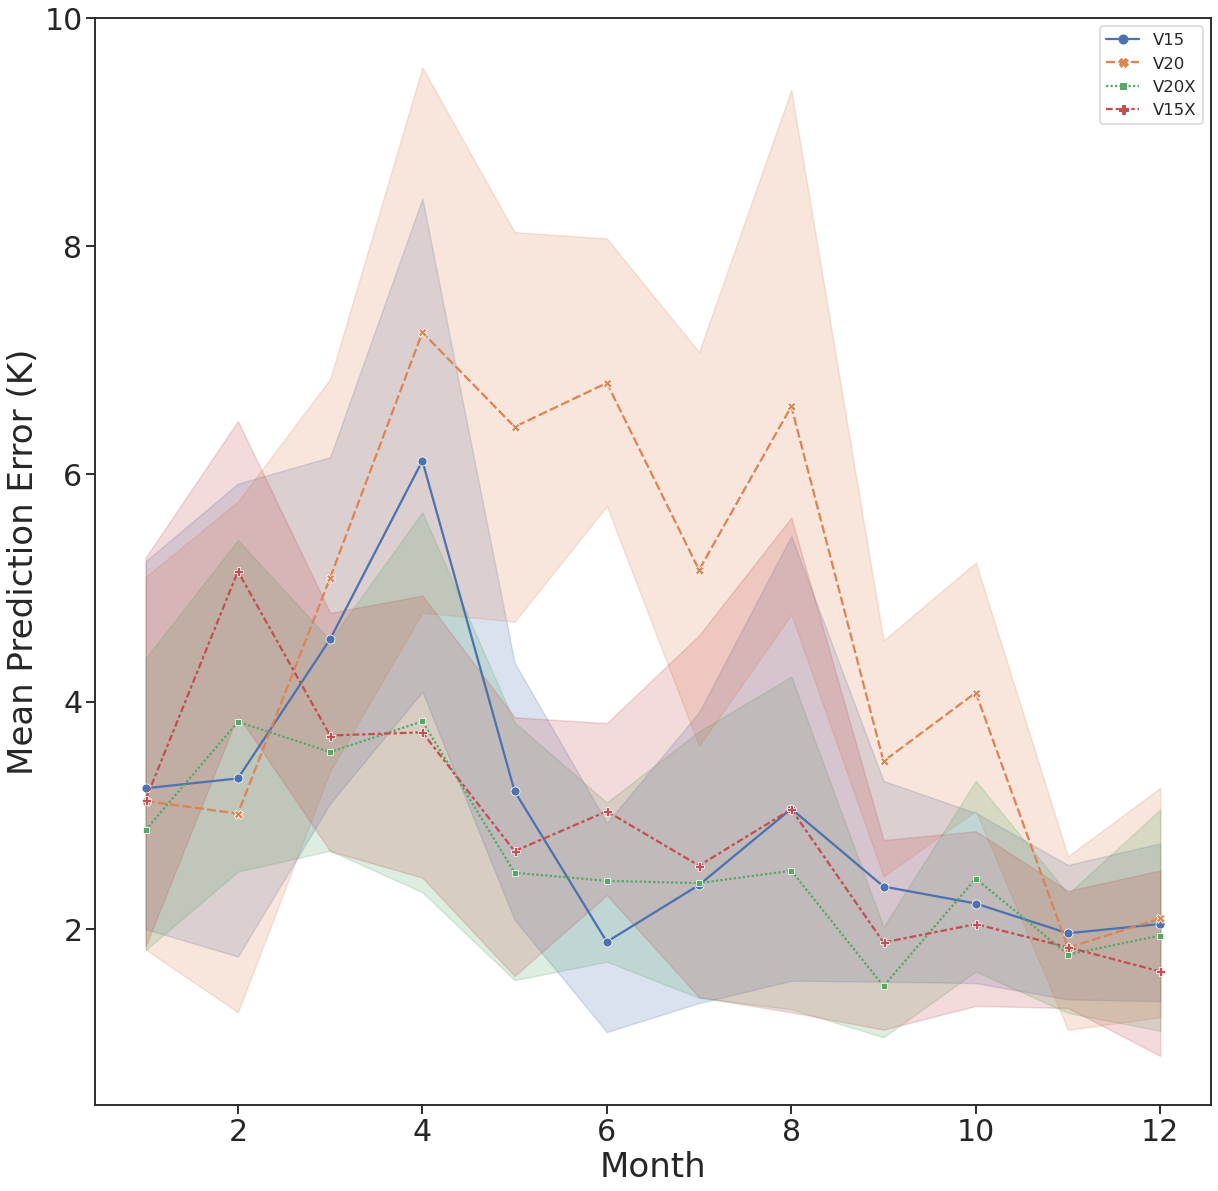

In [94]:
#Afghanistan
lat = round(31.615914311651938,3)
lon =  round(61.12,3)
df_selected = df_timeseries.query(f'latitude_join == {lat} & longitude_join == {lon}').reset_index()
display(df_selected)
plot_timeseries(df_selected,savefig=None)

index  latitude_ERA  longitude_ERA                time   MODIS_LST  \
0       44995     -2.107728           36.0 2019-01-01 11:00:00  311.917389   
1      144143     -2.107728           36.0 2019-01-02 11:00:00  315.742432   
2      243843     -2.107728           36.0 2019-01-03 11:00:00  312.265228   
3      545027     -2.107728           36.0 2019-01-06 11:00:00  315.036896   
4      638473     -2.107728           36.0 2019-01-07 11:00:00  314.400726   
...       ...           ...            ...                 ...         ...   
1079  2452384     -2.107728           36.0 2019-12-25 11:00:00  304.645935   
1080  2556512     -2.107728           36.0 2019-12-26 11:00:00  304.891724   
1081  2760201     -2.107728           36.0 2019-12-28 11:00:00  300.527039   
1082  2953425     -2.107728           36.0 2019-12-30 11:00:00  303.428772   
1083  3054979     -2.107728           36.0 2019-12-31 11:00:00  307.980591   

      skt_unnormalised  number_of_modis_observations  predictions  \
0           318.447449                            64   317.363647   
1           320.079407                            64   318.009979   
2           319.974121                            64   318.239532   
3           319.408875                            56   317.746185   
4           321.612366                            63   318.816528   
...                ...                           ...          ...   
1079        306.963684                            42   305.891937   
1080        301.659424                            25   301.816254   
1081        302.767151                             6   302.946625   
1082        305.631500                            61   305.091522   
1083        306.106964                            64   305.584778   

      predicion_bias  predicion_error model  latitude_join  longitude_join  \
0          -5.446259         5.446259   V15         -2.108            36.0   
1          -2.267548         2.267548   V15         -2.108            36.0   
2          -5.974304         5.974304   V15         -2.108            36.0   
3          -2.709290         2.709290   V15         -2.108            36.0   
4          -4.415802         4.415802   V15         -2.108            36.0   
...              ...              ...   ...            ...             ...   
1079       -1.246002         1.246002  V15X         -2.108            36.0   
1080        3.075470         3.075470  V15X         -2.108            36.0   
1081       -2.419586         2.419586  V15X         -2.108            36.0   
1082       -1.662750         1.662750  V15X         -2.108            36.0   
1083        2.395813         2.395813  V15X         -2.108            36.0   

      month         day  
0         1  2019-01-01  
1         1  2019-01-02  
2         1  2019-01-03  
3         1  2019-01-06  
4         1  2019-01-07  
...     ...         ...  
1079     12  2019-12-25  
1080     12  2019-12-26  
1081     12  2019-12-28  
1082     12  2019-12-30  
1083     12  2019-12-31  

[1084 rows x 15 columns]

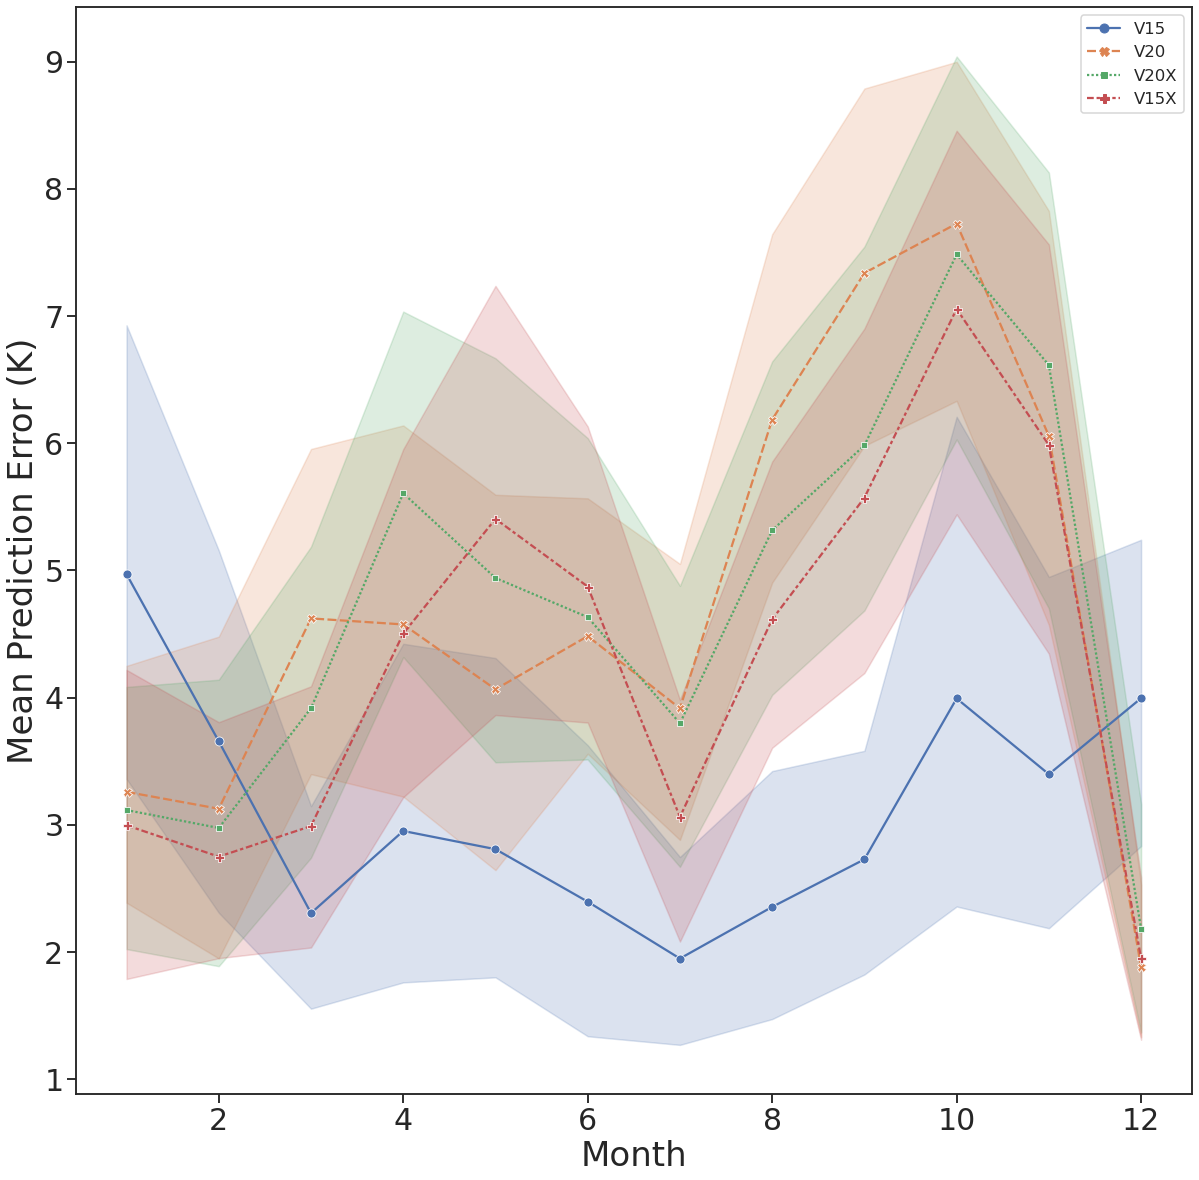

In [95]:

#Lake natron edge
lat = round(-2.10772769472398,3)
lon =  round(36.0,3)
df_selected = df_timeseries.query(f'latitude_join == {lat} & longitude_join == {lon}').reset_index()
display(df_selected)
plot_timeseries(df_selected,savefig=None)



index  latitude_ERA  longitude_ERA                time   MODIS_LST  \
0       34287     24.028095           69.0 2019-01-01 09:00:00  309.696259   
1      134024     24.028095           69.0 2019-01-02 09:00:00  310.797729   
2      234904     24.028095           69.0 2019-01-03 09:00:00  311.691132   
3      334111     24.028095           69.0 2019-01-04 09:00:00  312.274994   
4      433770     24.028095           69.0 2019-01-05 09:00:00  307.672821   
...       ...           ...            ...                 ...         ...   
1147  2543660     24.028095           69.0 2019-12-26 09:00:00  303.550476   
1148  2649309     24.028095           69.0 2019-12-27 09:00:00  300.317352   
1149  2750427     24.028095           69.0 2019-12-28 09:00:00  303.669312   
1150  2942942     24.028095           69.0 2019-12-30 09:00:00  300.742004   
1151  3044481     24.028095           69.0 2019-12-31 09:00:00  298.109344   

      skt_unnormalised  number_of_modis_observations  predictions  \
0           292.455811                            13   299.006317   
1           293.694031                            15   297.451508   
2           294.347900                            14   299.130615   
3           294.517639                             2   300.623260   
4           295.321869                            14   298.633270   
...                ...                           ...          ...   
1147        290.740417                            13   300.398468   
1148        290.634583                             5   301.531097   
1149        290.659485                            15   300.852692   
1150        289.935425                            13   298.172241   
1151        289.629150                             5   296.583008   

      predicion_bias  predicion_error model  latitude_join  longitude_join  \
0          10.689941        10.689941   V15         24.028            69.0   
1          13.346222        13.346222   V15         24.028            69.0   
2          12.560516        12.560516   V15         24.028            69.0   
3          11.651733        11.651733   V15         24.028            69.0   
4           9.039551         9.039551   V15         24.028            69.0   
...              ...              ...   ...            ...             ...   
1147        3.152008         3.152008  V15X         24.028            69.0   
1148       -1.213745         1.213745  V15X         24.028            69.0   
1149        2.816620         2.816620  V15X         24.028            69.0   
1150        2.569763         2.569763  V15X         24.028            69.0   
1151        1.526337         1.526337  V15X         24.028            69.0   

      month         day  
0         1  2019-01-01  
1         1  2019-01-02  
2         1  2019-01-03  
3         1  2019-01-04  
4         1  2019-01-05  
...     ...         ...  
1147     12  2019-12-26  
1148     12  2019-12-27  
1149     12  2019-12-28  
1150     12  2019-12-30  
1151     12  2019-12-31  

[1152 rows x 15 columns]

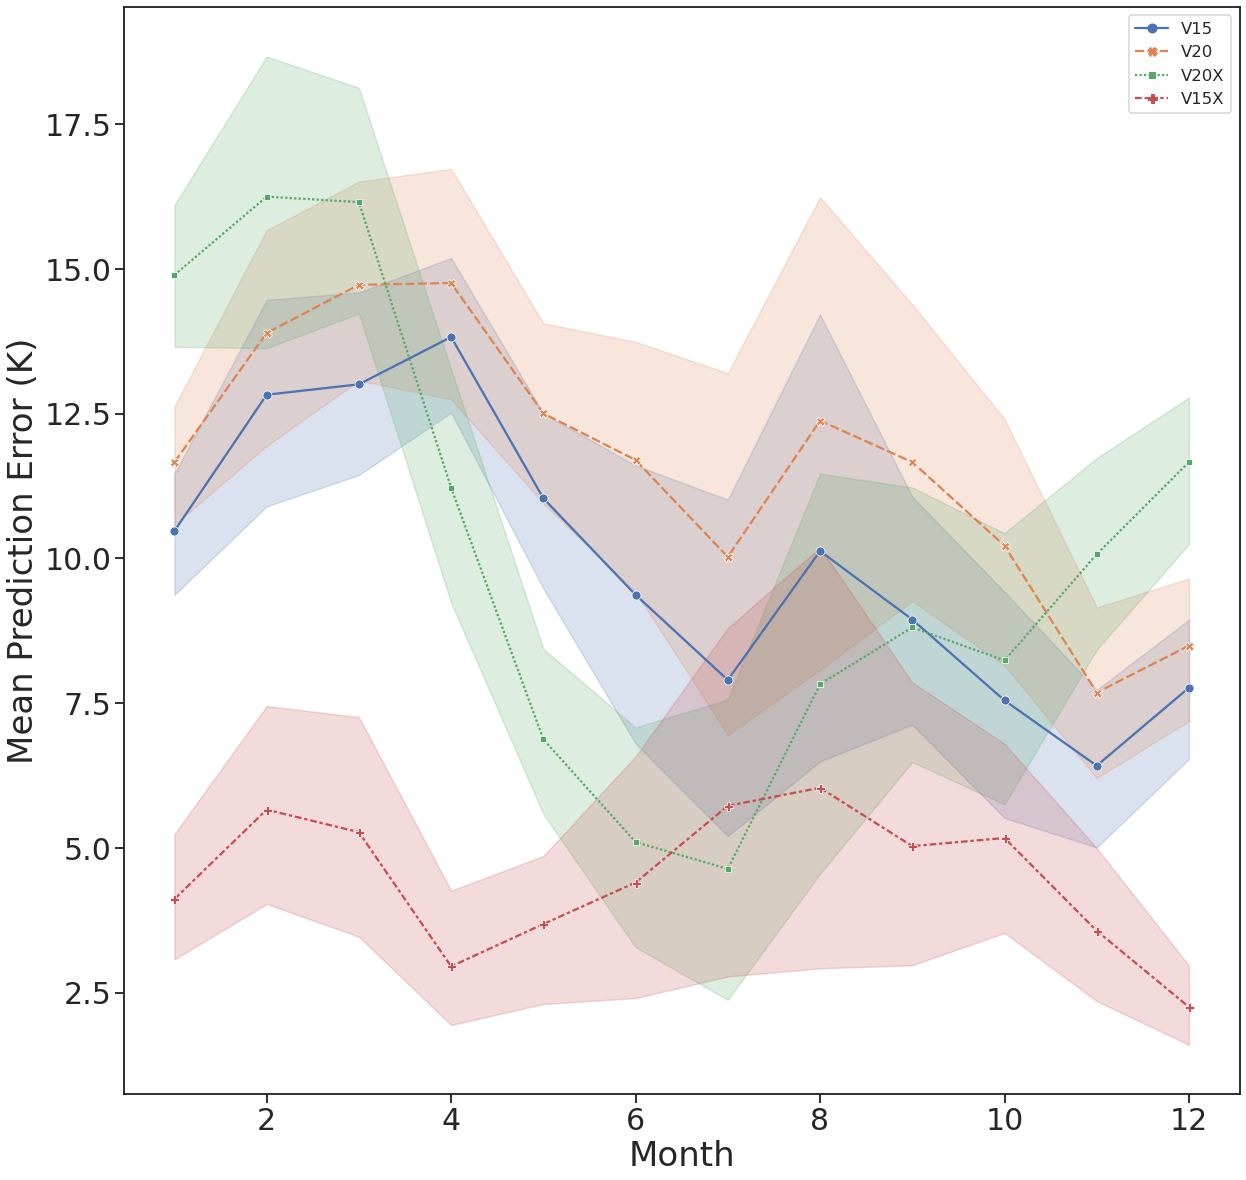

In [99]:
#Northern indisa
lat = round(24.028095261448925,3)
lon =  round(69.0,3)
df_selected = df_timeseries.query(f'latitude_join == {lat} & longitude_join == {lon}').reset_index()
display(df_selected)
plot_timeseries(df_selected,savefig='figs/india_timeseries.png')


index  latitude_ERA  longitude_ERA                time   MODIS_LST  \
0      247569     23.185004           30.9 2019-01-03 11:00:00  300.972961   
1      348491     23.185004           30.9 2019-01-04 11:00:00  306.086517   
2      737799     23.185004           30.9 2019-01-08 11:00:00  301.381439   
3      833685     23.185004           30.9 2019-01-09 11:00:00  299.963257   
4      933722     23.185004           30.9 2019-01-10 11:00:00  302.582611   
...       ...           ...            ...                 ...         ...   
1291  2665079     23.185004           30.9 2019-12-27 11:00:00  303.584625   
1292  2764324     23.185004           30.9 2019-12-28 11:00:00  303.955475   
1293  2862332     23.185004           30.9 2019-12-29 11:00:00  306.219635   
1294  2957053     23.185004           30.9 2019-12-30 11:00:00  305.307892   
1295  3058917     23.185004           30.9 2019-12-31 11:00:00  304.885803   

      skt_unnormalised  number_of_modis_observations  predictions  \
0           297.134277                            81   305.730316   
1           299.211090                            81   307.414948   
2           295.908844                            81   304.779480   
3           296.024048                            75   304.436768   
4           298.338928                            60   306.861664   
...                ...                           ...          ...   
1291        298.099548                            63   302.286926   
1292        298.327698                            66   302.325775   
1293        299.812073                            75   304.151245   
1294        299.072906                            76   303.427521   
1295        297.933136                            76   301.679443   

      predicion_bias  predicion_error model  latitude_join  longitude_join  \
0          -4.757355         4.757355   V15         23.185            30.9   
1          -1.328430         1.328430   V15         23.185            30.9   
2          -3.398041         3.398041   V15         23.185            30.9   
3          -4.473511         4.473511   V15         23.185            30.9   
4          -4.279053         4.279053   V15         23.185            30.9   
...              ...              ...   ...            ...             ...   
1291        1.297699         1.297699  V15X         23.185            30.9   
1292        1.629700         1.629700  V15X         23.185            30.9   
1293        2.068390         2.068390  V15X         23.185            30.9   
1294        1.880371         1.880371  V15X         23.185            30.9   
1295        3.206360         3.206360  V15X         23.185            30.9   

      month         day  
0         1  2019-01-03  
1         1  2019-01-04  
2         1  2019-01-08  
3         1  2019-01-09  
4         1  2019-01-10  
...     ...         ...  
1291     12  2019-12-27  
1292     12  2019-12-28  
1293     12  2019-12-29  
1294     12  2019-12-30  
1295     12  2019-12-31  

[1296 rows x 15 columns]

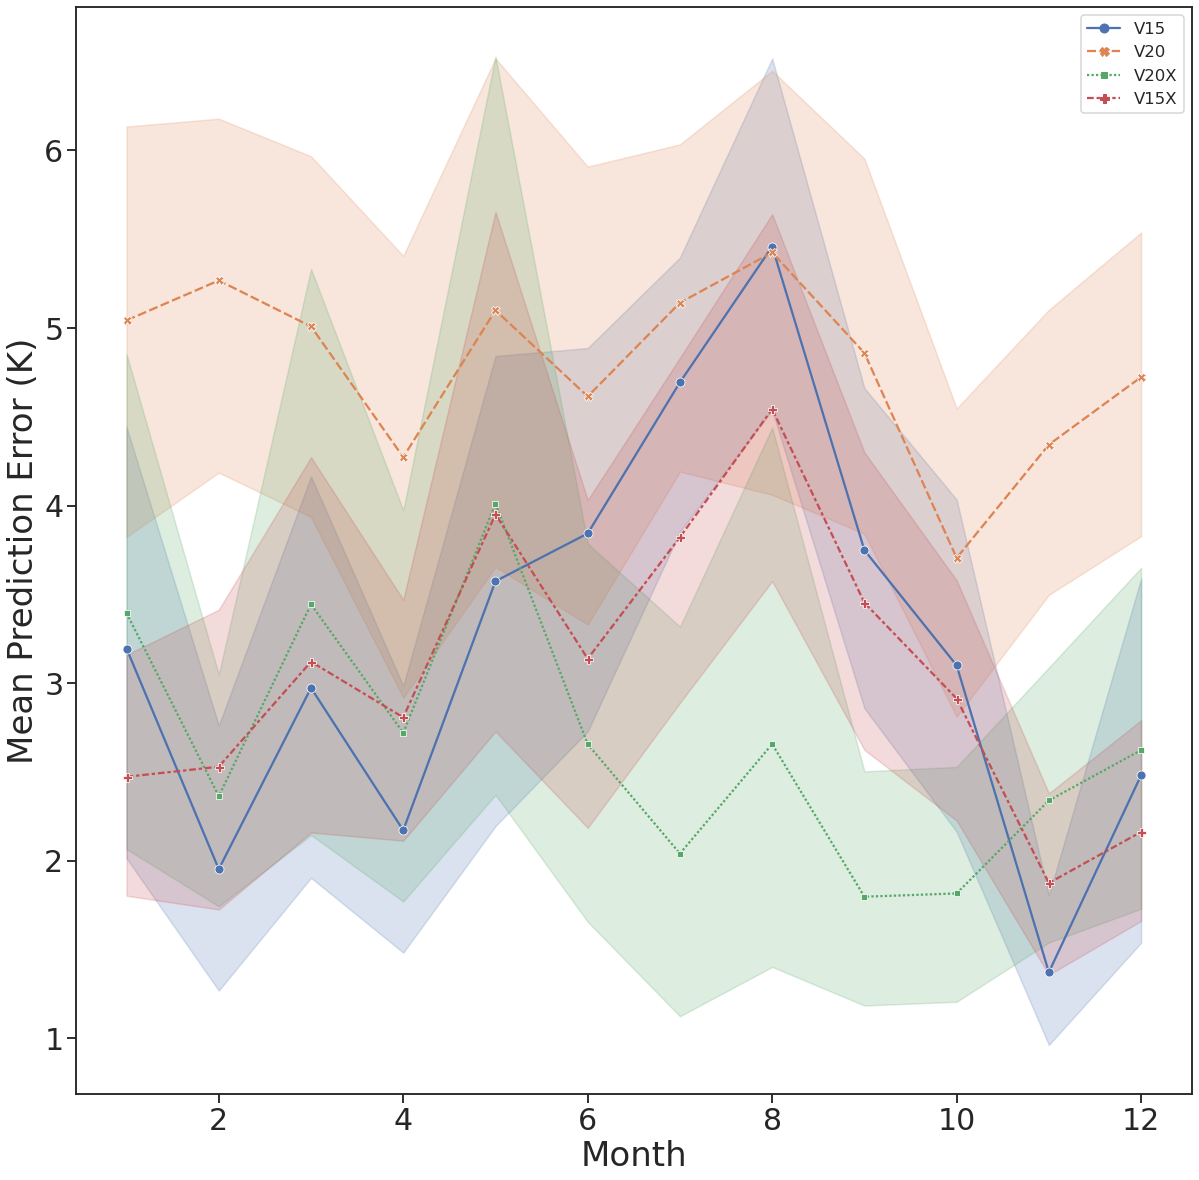

In [97]:
#Toshka lakes
lat = round(23.18500423251539,3)
lon =  round(30.9,3)
df_selected = df_timeseries.query(f'latitude_join == {lat} & longitude_join == {lon}').reset_index()
display(df_selected)
plot_timeseries(df_selected,savefig=None)




In [55]:
chott_lat = round(34.145187223212716,3)
chott_lon = round(6.0800000000000125,3)

#Create a mask to filter by
chott_condition = f'latitude_join == {chott_lat} & longitude_join == {chott_lon}'
chott_mask = change_in_fields.query(chott_condition)
df_timeseries_categorized_chott = pd.merge(df_timeseries,chott_mask,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_chott = df_timeseries_categorized_chott.reset_index()



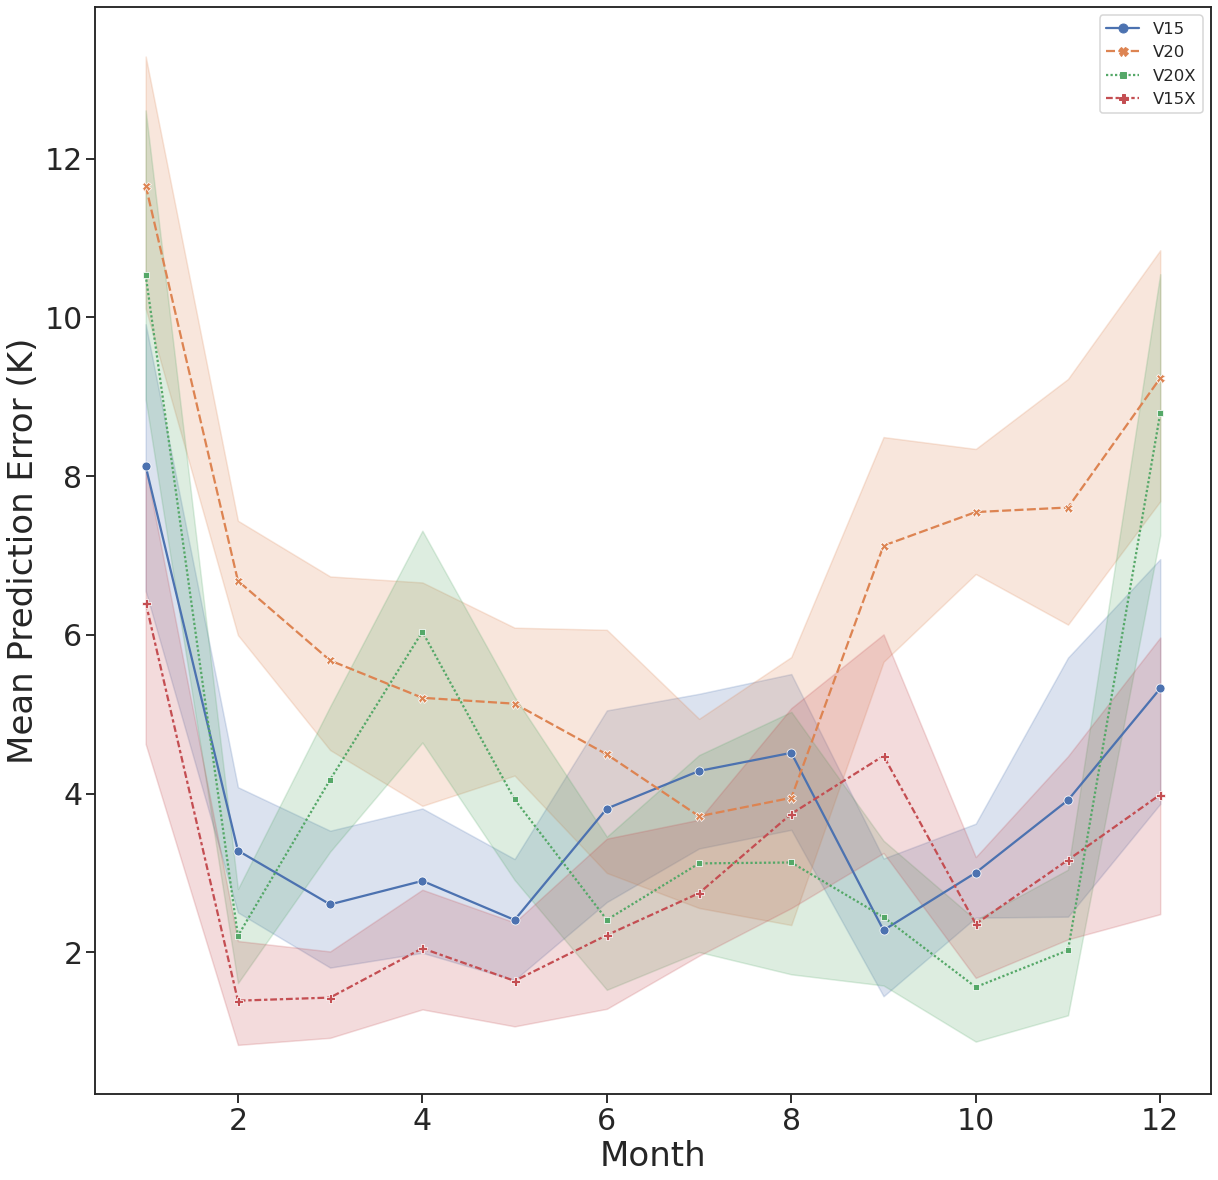

In [56]:
plot_timeseries(df_timeseries_categorized_chott,savefig=None)

## Salt lake city

In [83]:
SLC_lat = round(41.17094491970063,3)
SLC_lon = round(-113.39999999999998,3)

#Create a mask to filter by
SLC_condition = f'latitude_join == {SLC_lat} & longitude_join == {SLC_lon}'
SLC_mask = change_in_fields.query(SLC_condition)
df_timeseries_categorized_SLC = pd.merge(df_timeseries,SLC_mask,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_SLC = df_timeseries_categorized_SLC.reset_index()



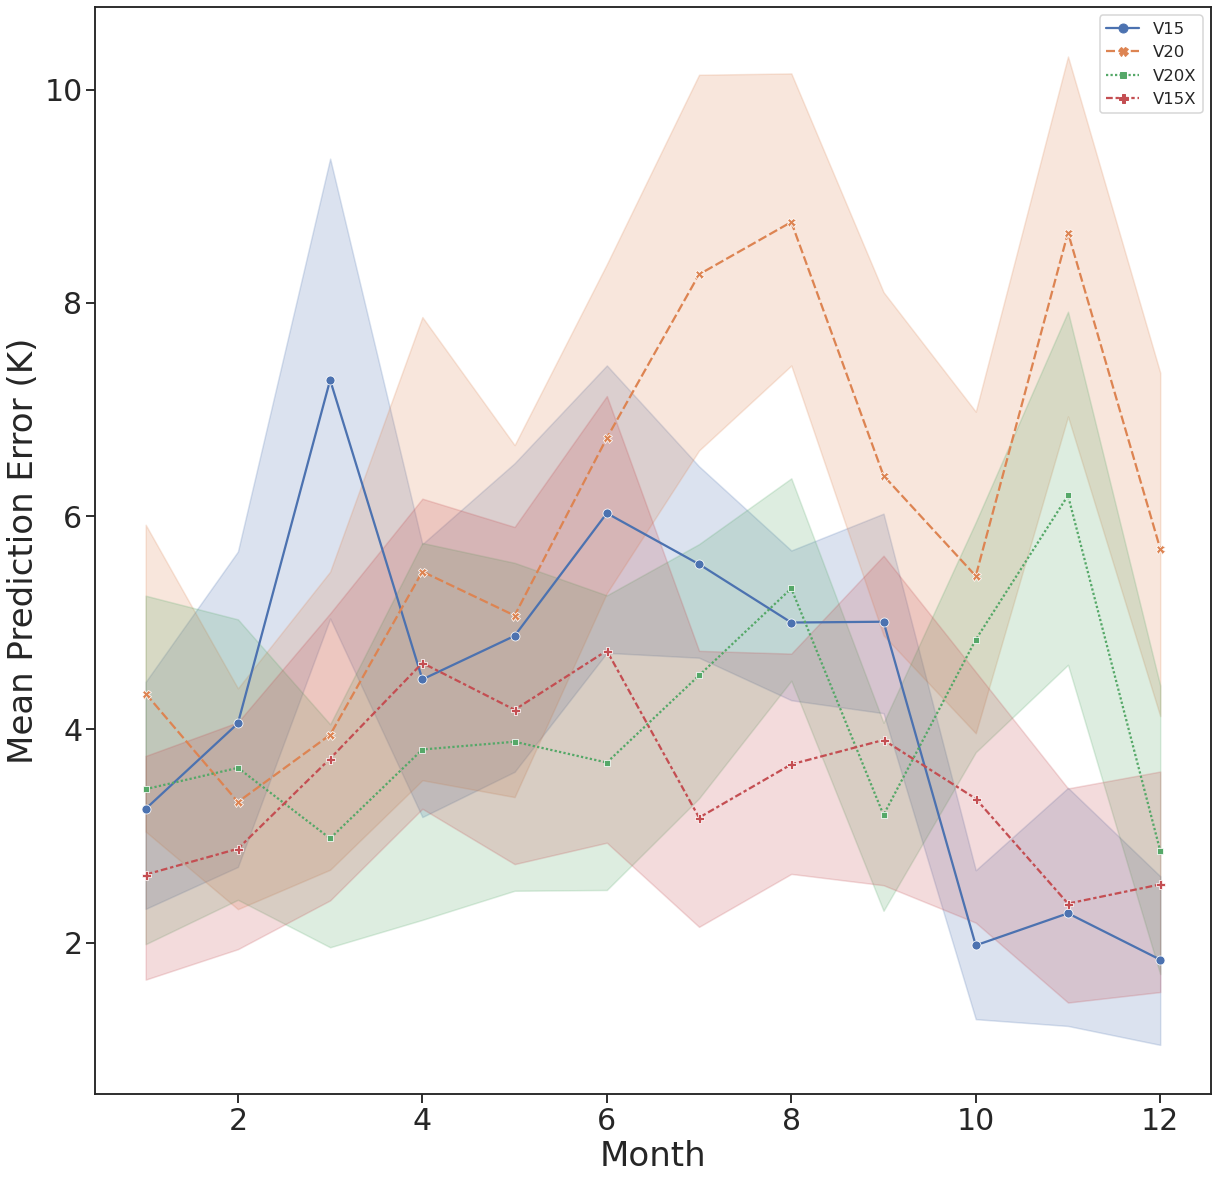

In [84]:
plot_timeseries(df_timeseries_categorized_SLC,savefig=None)

# Lake Nattron


In [85]:

LN_lat = round(-2.3887580539270044,3)
LN_lon = round(36.0,3)

#Create a mask to filter by
LN_condition = f'latitude_join == {LN_lat} & longitude_join == {LN_lon}'
LN_mask = change_in_fields.query(LN_condition)
df_timeseries_categorized_LN = pd.merge(df_timeseries,LN_mask,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_LN = df_timeseries_categorized_LN.reset_index()






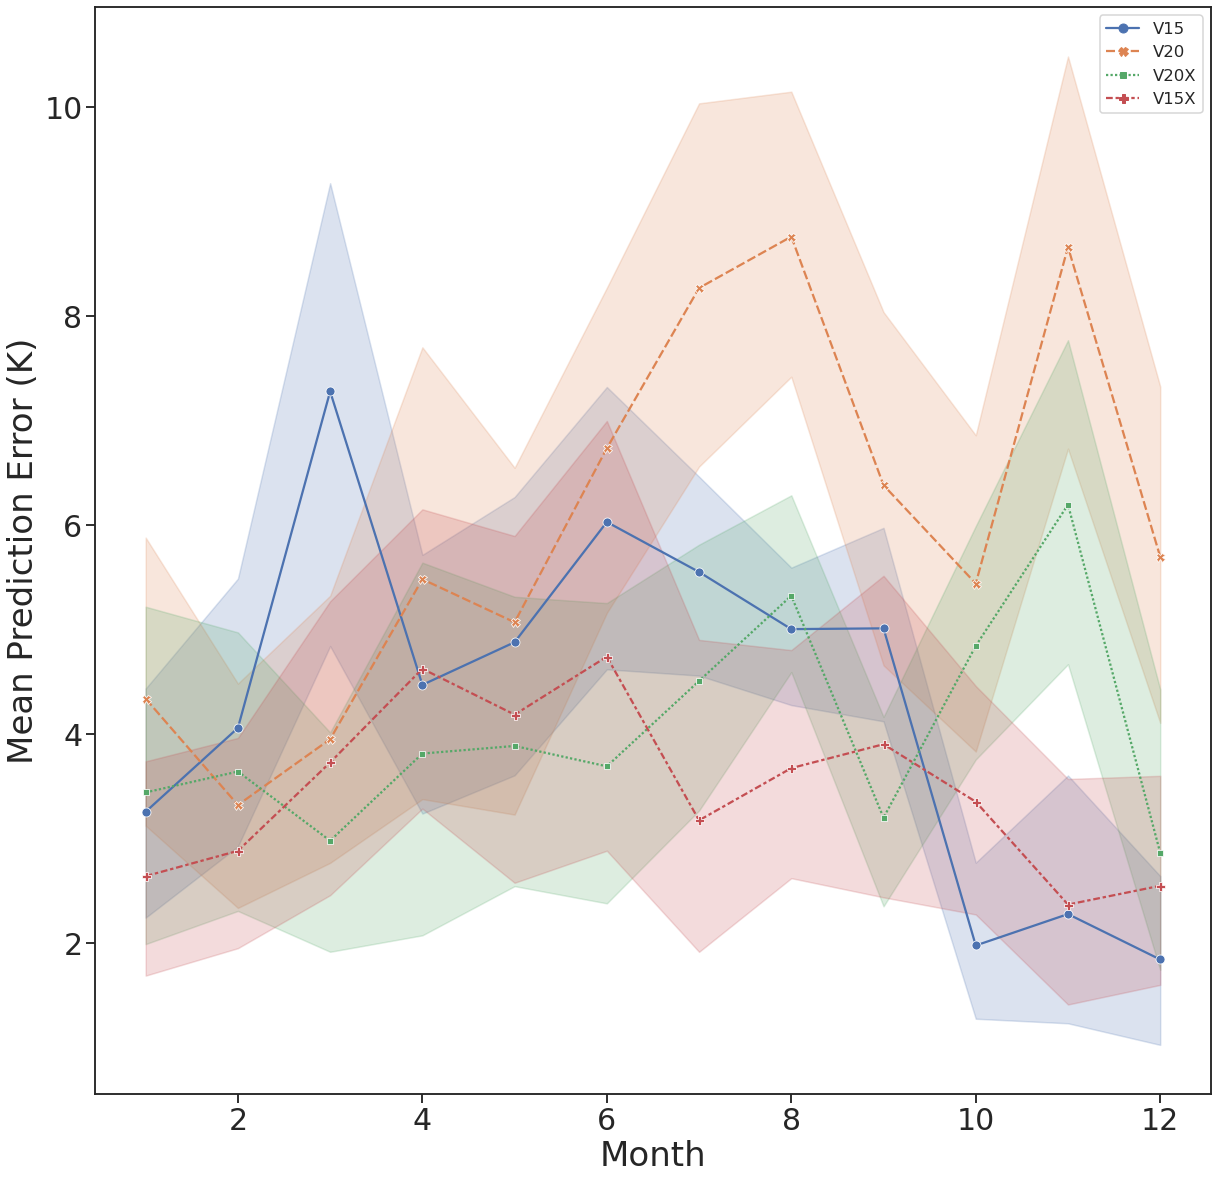

In [86]:
plot_timeseries(df_timeseries_categorized_SLC,savefig=None)

## Stacked - Lakes

In [101]:
def plot_stacked_timeseries(df2,df3,savefig):

    h,w = 20,2*20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, (ax2,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(h,w))
    p2 = sns.lineplot(data=df2, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax2,markers=True)
    p3 = sns.lineplot(data=df3, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax3,markers=True,legend=False)


    

    for ax in [ax2]:
        ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are o
        ax.set_xlabel("")
        ax.set_ylabel("Mean Prediction Error (K)",fontsize=34)
        ax.legend().set_title(None)
        ax.tick_params(labelsize=30)
        


    
    
    
    plt.subplots_adjust(wspace=0.01, hspace=0.01)

    
    ax3.set_xlabel("Month",fontsize=34)
    ax3.set_ylabel("Mean Prediction Error (K)",fontsize=34)
    #ax3.legend().set_title(None)
    ax3.tick_params(labelsize=30)
    
    
    #ax2.set_ylim(2.4,4.75)
    #ax3.set_ylim(2.4,4.75)

    
    plt.setp(ax2.get_yticklabels()[0], visible=False)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    

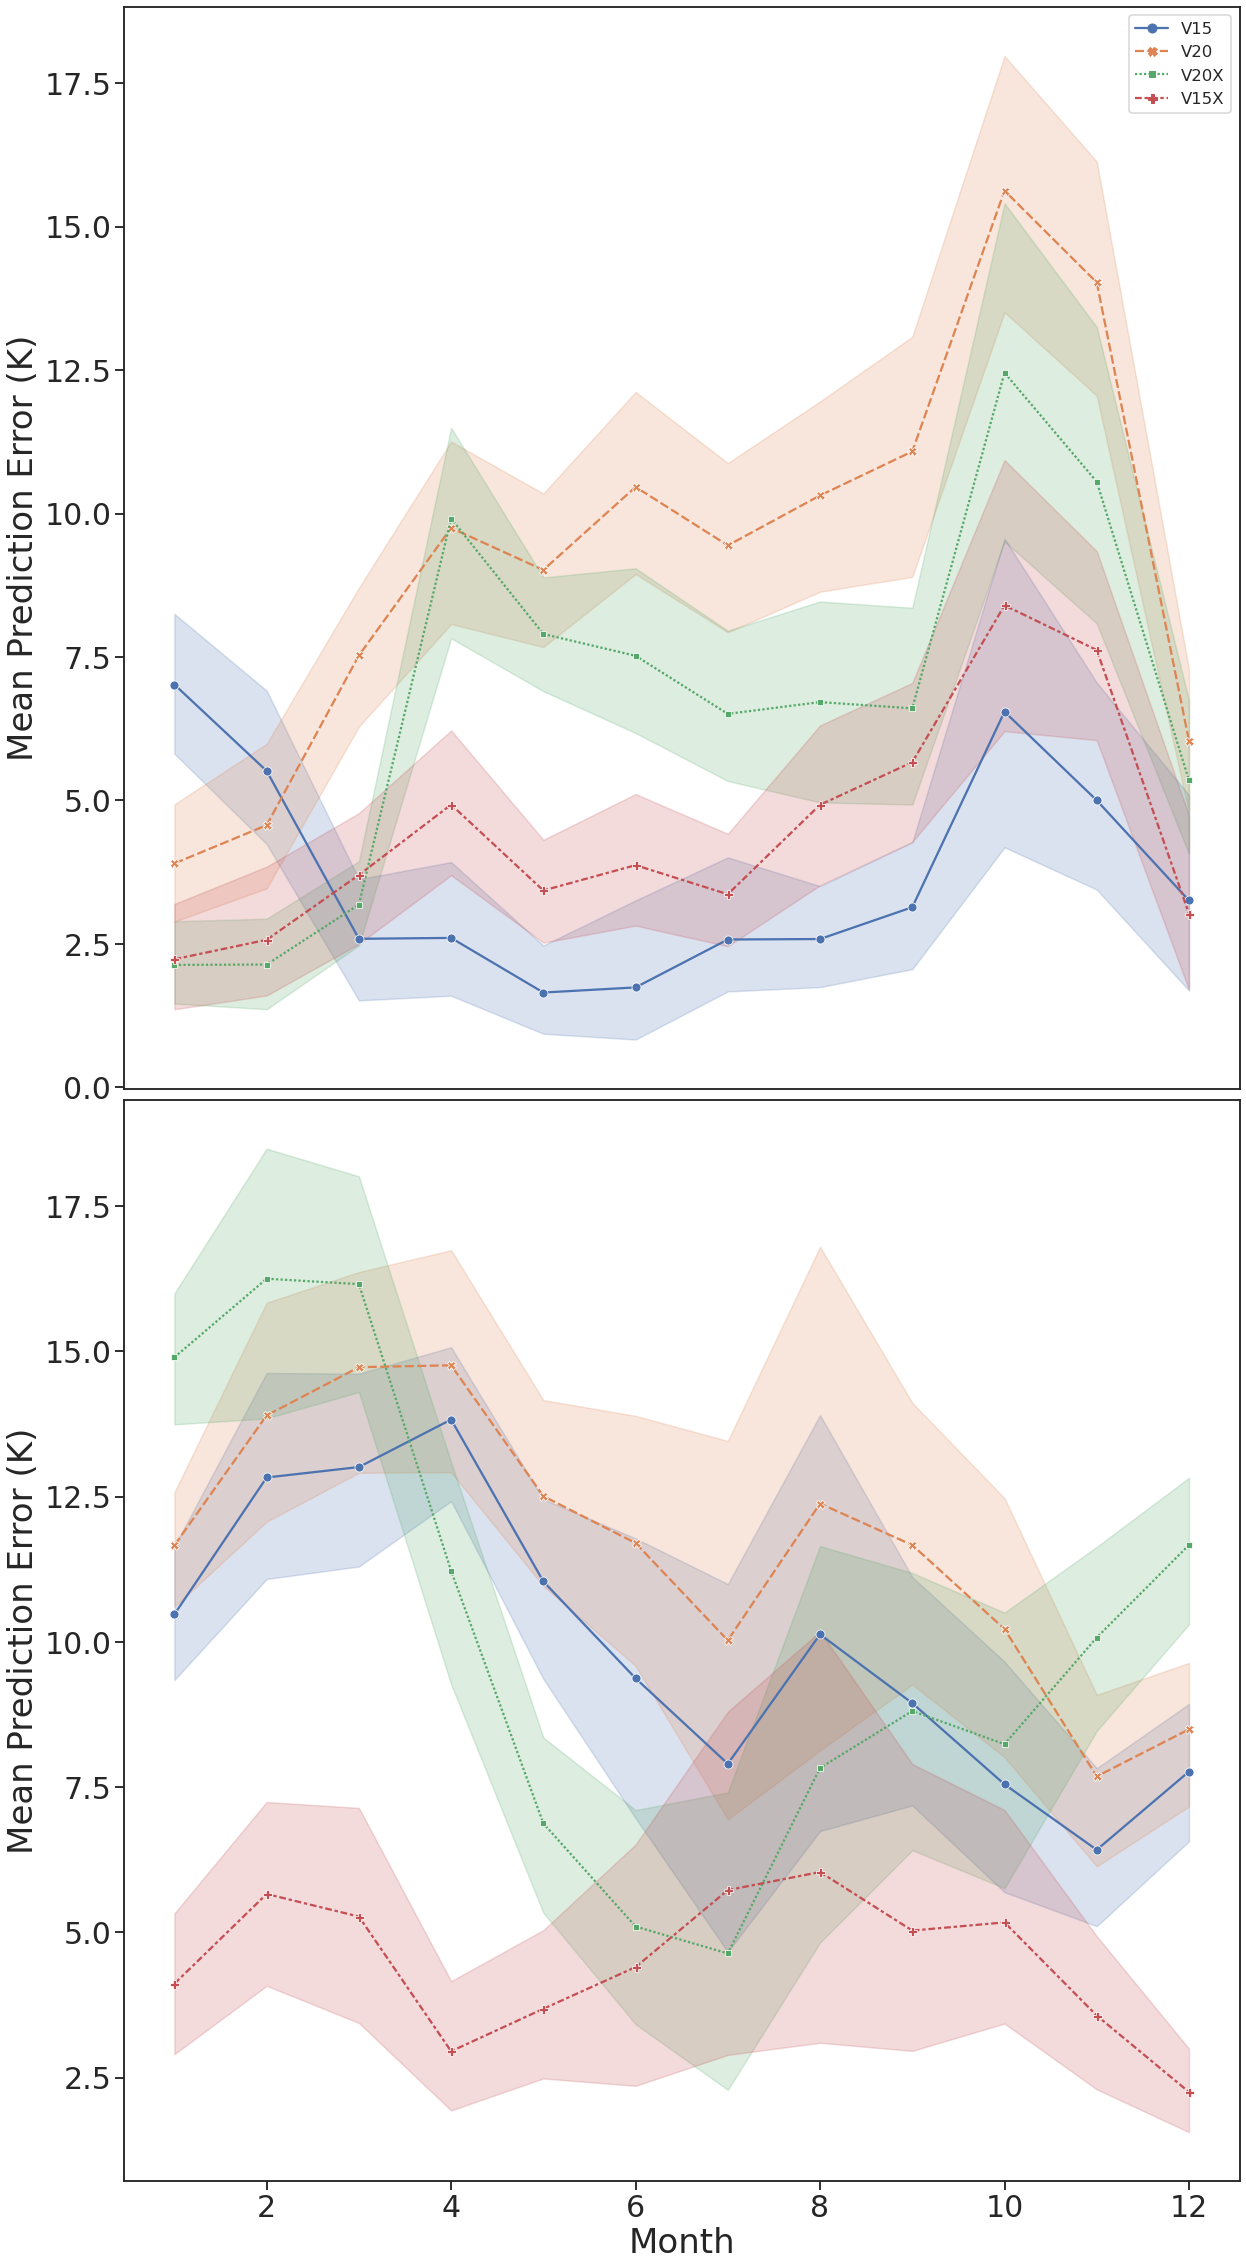

In [102]:


lat_ind = round(24.028095261448925,3)
lon_ind =  round(69.0,3)
df_selected_india = df_timeseries.query(f'latitude_join == {lat_ind} & longitude_join == {lon_ind}').reset_index()



lat = -2.3887580539270044
lon=   36.0
df_selected_LN = df_timeseries.query(f'latitude_ERA == {lat} & longitude_ERA == {lon}').reset_index()




plot_stacked_timeseries(df_selected_LN,df_selected_india,savefig='figs/stacked_timeseries_lakes_new.png')